#### Creating loop to capture residues bind with the drug

In [1]:
import subprocess
from tqdm import tqdm
import sys
import os
import concurrent
from tqdm import tqdm

In [2]:
sys.executable

'C:\\Users\\Y-8874903-E.ESTUDIANT\\Anaconda3\\python.exe'

In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
def VinaResult(file):
    if os.path.isfile(f"DockedPDBQT/{file}_out_out.pdbqt"):
        os.system(f"""process_VinaResult.py -f DockedPDBQT/{file}_out_out.pdbqt -r protein/6fn1_minimized.pdbqt -B -x 1 -p""")
        return file
    else:
        return None

In [5]:
ResArray = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    out = {executor.submit(VinaResult,i): i for i in range(358)}
    for future in tqdm(concurrent.futures.as_completed(out)):
        fp = future.result()
        print(fp)
        ResArray.append(fp)  

0it [00:00, ?it/s]


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [4]:
### Exrtact Data
import re

In [5]:
!pwd

/home/saurav/Desktop/P-gp data


In [6]:
def interactionMapper(file_num):
    efficiency = []
    nInteraction = []
    Iresidues= []
    LigandAtomNum = []
    
    if os.path.isfile(f"vinaRes/{file_num}_out_out_model1.pdbqt"):
        
        with open(f"vinaRes/{file_num}_out_out_model1.pdbqt","r") as file:
            lines = file.readlines()

        for i in lines:
            if re.findall("ligand efficiency",i):
                efficiency.append(float(i.strip("USER  AD>  ligand efficiency  ",).strip("\n")))

            if re.findall("macro_close_ats",i):
                Iresidues.append(int(i.strip("USER  AD> macro_close_ats: ",).strip("\n")))

            if re.findall("AD> 6fn1_minimized:",i):
                nInteraction.append(i.strip("USER  AD> 6fn1_minimized: :",).strip("\n"))

            if re.findall("lig_close_ats",i):
                LigandAtomNum.append(int(i.strip("USER  AD> lig_close_ats: ",).strip("\n")))

        return (efficiency,nInteraction,Iresidues,LigandAtomNum,file_num)
    else:
        return (None,file_num)

In [7]:
FPArray = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    out = {executor.submit(interactionMapper,i): i for i in range(358)}
    for future in tqdm(concurrent.futures.as_completed(out)):
        fp = future.result()
        print(fp[-1])
        FPArray.append(fp)  

358it [00:00, 2093.46it/s]


1
0
2
4
3
8
9
10
13
15
5
16
7
6
26
11
14
28
12
29
35
30
21
37
17
36
19
18
23
33
32
20
22
24
25
27
34
31
38
39
40
42
41
43
44
52
53
55
47
49
60
45
64
54
67
58
59
62
66
61
71
73
65
46
51
63
74
69
75
72
48
56
68
50
57
70
76
78
77
79
81
80
88
89
83
90
85
91
92
82
84
98
102
104
94
87
96
93
101
100
103
95
99
108
110
106
86
107
97
109
105
111
112
115
116
114
117
127
113
118
119
122
121
120
124
130
143
123
144
129
128
126
132
135
125
134
133
131
137
139
142
140
136
145
141
138
146
147
148
149
151
156
152
155
154
168
153
169
150
157
172
163
161
166
160
165
178
177
162
159
173
167
175
164
176
158
171
174
170
180
182
179
190
183
184
192
189
187
186
202
203
198
195
185
188
191
200
193
199
196
197
204
194
210
201
205
207
206
211
208
212
209
181
213
215
214
218
220
225
227
216
217
224
221
223
219
226
222
229
244
239
237
230
234
228
243
232
246
235
236
240
233
241
231
242
238
245
247
248
249
250
252
256
262
251
255
263
266
267
258
264
253
274
254
265
261
259
257
268
260
270
271
273
276
269
272
281
27

In [8]:
SortedFP= sorted(FPArray,key=lambda x:x[-1])

In [9]:
SortedFP

[([-0.2091],
  ['GLN346:CG',
   'LEU878:CD1',
   'PHE342:CD1',
   'TRP231:CG',
   'PHE342:CB',
   'LA301:CB'],
  [6],
  [5],
  0),
 (None, 1),
 (None, 2),
 ([-0.2333],
  ['PHE335:CE2',
   'ILE305:CG2',
   'TYR952:CE2',
   '343:CA',
   'LEU338:CG',
   'PHE71:CG',
   'TYR309:OH',
   'TYR952:OH',
   'ILE305:CD1',
   'LEU338:CD2',
   'TYR309:CE1',
   'LEU64:CD2',
   'PHE982:CZ',
   'PHE71:CD1',
   'MET68:SD',
   'PHE342:CD1'],
  [16],
  [13],
  3),
 (None, 4),
 ([-0.26],
  ['PHE342:CE1', 'TYR309:OH', 'ILE339:CG2', 'PHE342:CD1', 'ILE305:CD1'],
  [5],
  [4],
  5),
 ([-0.3214],
  ['PHE302:CE2',
   'LEU64:CD1',
   'LEU338:CG',
   'ILE339:CG2',
   'PHE727:CD2',
   'LEU338:CD2',
   'PHE982:CD2',
   'MET985:CG',
   'ILE305:CD1',
   '343:CA'],
  [10],
  [6],
  6),
 ([-0.405],
  ['TRP231:CE3',
   'ILE305:CG2',
   'LA228:CA',
   'PHE342:C',
   'PHE342:CD2',
   'LA228:CB'],
  [6],
  [5],
  7),
 (None, 8),
 (None, 9),
 (None, 10),
 ([-0.3529],
  ['N720:O', 'MET298:CE', 'GLN772:CG', 'N720:CB', 'N720:C'

### Looking for most common residues taking part in Interaction

In [10]:
residues = []
for i in SortedFP:
    if i[0] == None:
        continue
    else:
        residues.extend(i[1])

In [11]:
from collections import Counter

In [12]:
sorted_residues = sorted(Counter(residues).items(),key=lambda y:y[-1],reverse=True)

In [13]:
SortedFP[0][1]

['GLN346:CG', 'LEU878:CD1', 'PHE342:CD1', 'TRP231:CG', 'PHE342:CB', 'LA301:CB']

In [14]:
def residueExtractor(res):
    index = res.index(":")
    residue = res[:index]
    
    return residue

In [15]:
resList = [ residueExtractor(i[0]) for i in sorted_residues]

In [16]:
resList

['PHE342',
 'TRP231',
 'ILE305',
 'PHE302',
 'PHE342',
 'ILE305',
 'TRP231',
 'PHE302',
 'LA301',
 'VAL990',
 'ILE339',
 'LA228',
 'MET298',
 'PHE727',
 'PHE727',
 'PHE342',
 'LEU878',
 'TRP231',
 'PHE769',
 'LA228',
 'LEU64',
 'PHE993',
 'PHE342',
 'PHE982',
 'GLN346',
 'TRP231',
 'N720',
 'TRP231',
 'TYR309',
 'PHE342',
 'PHE769',
 'PHE302',
 'PHE335',
 'PHE982',
 'PHE302',
 'GLN724',
 'PHE342',
 'GLN346',
 'PHE769',
 'PHE342',
 'TRP231',
 'GLN724',
 'GLN989',
 'THR198',
 'VAL990',
 'PHE982',
 'GLN989',
 'PHE982',
 'ILE339',
 'PHE335',
 'GLN989',
 'GLN837',
 'TYR309',
 'GLN346',
 'LA986',
 'PHE982',
 'TRP231',
 'LEU338',
 'PHE982',
 'LEU878',
 'GLN346',
 'PHE993',
 'TYR306',
 'GLN772',
 'TYR306',
 'GLN724',
 'LEU235',
 '343',
 'PHE727',
 'PHE727',
 'LA232',
 'GLY773',
 'VAL990',
 'LA994',
 'PHE769',
 'PHE342',
 'PHE335',
 'GLY345',
 'LA301',
 'LEU338',
 'MET948',
 'MET985',
 'PRO349',
 'TYR306',
 'GLN346',
 'TYR952',
 'N720',
 'GLU874',
 'GLN772',
 'LA986',
 'GLN989',
 'TRP231',
 'PH

#### PLotting Residues

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
Top10rescount = [i[1] for i in sorted_residues][:10]
Top10rescount = np.array(Top10rescount)
Top10rescount

array([104, 100,  98,  92,  86,  85,  82,  75,  72,  66])

In [43]:
Top10res = [i for i in resList][:10]
Top10res = np.array(Top10res)
Top10res

array(['PHE342', 'TRP231', 'ILE305', 'PHE302', 'PHE342', 'ILE305',
       'TRP231', 'PHE302', 'LA301', 'VAL990'], dtype='<U6')

/home/saurav/anaconda3/envs/Jupyter_Dock/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


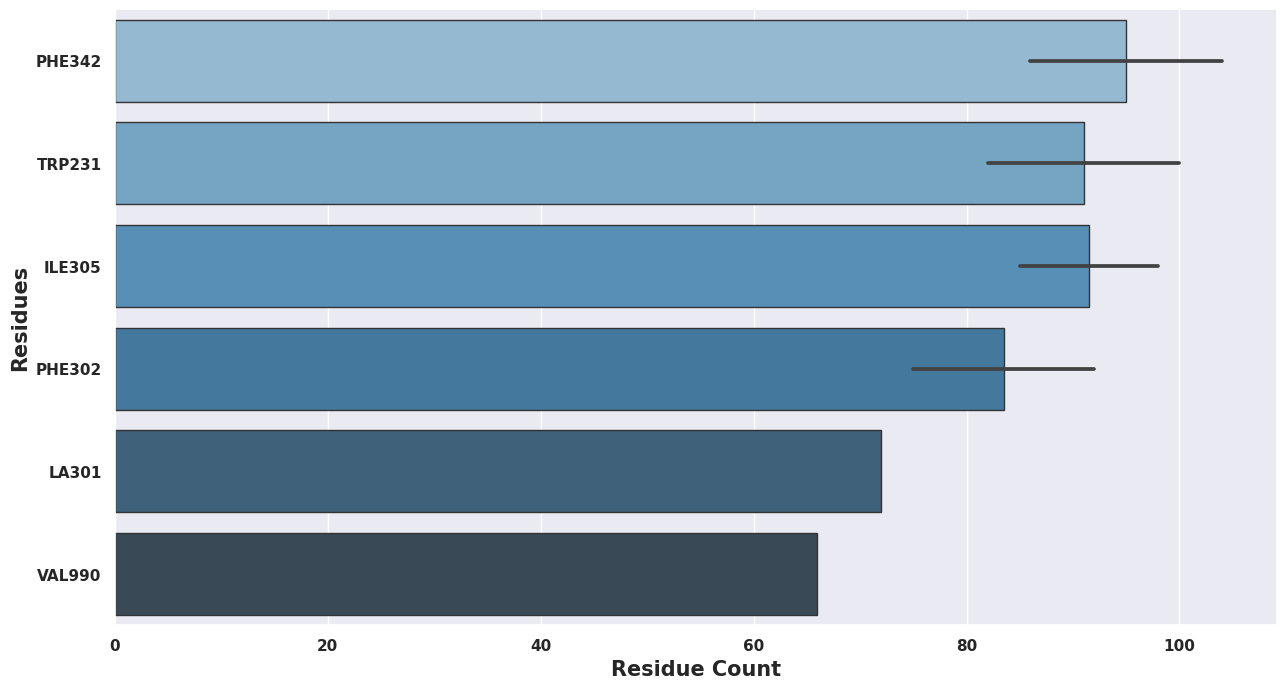

In [80]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams["font.weight"] = "bold"
sns.barplot(Top10rescount,Top10res,palette="Blues_d",dodge=False,edgecolor=".2",orient="h")
plt.xlabel("Residue Count",fontdict={"weight":'bold',"size":15})
plt.ylabel("Residues",fontdict={"weight":'bold',"size":15})
plt.show()

In [81]:
len(set(resList)) ### only 62 residues participate in this

62

In [82]:
set(resList) ## Most Common Residues

{'227',
 '236',
 '343',
 '728',
 '765',
 '978',
 'GLN194',
 'GLN346',
 'GLN724',
 'GLN772',
 'GLN837',
 'GLN945',
 'GLN989',
 'GLU874',
 'GLY345',
 'GLY773',
 'ILE305',
 'ILE339',
 'LA228',
 'LA232',
 'LA301',
 'LA833',
 'LA986',
 'LA994',
 'LEU235',
 'LEU338',
 'LEU64',
 'LEU723',
 'LEU878',
 'LYS188',
 'MET191',
 'MET298',
 'MET67',
 'MET68',
 'MET875',
 'MET948',
 'MET985',
 'N295',
 'N350',
 'N720',
 'N841',
 'PHE302',
 'PHE335',
 'PHE342',
 'PHE71',
 'PHE727',
 'PHE731',
 'PHE769',
 'PHE776',
 'PHE941',
 'PHE977',
 'PHE982',
 'PHE993',
 'PRO349',
 'THR198',
 'TRP231',
 'TYR306',
 'TYR309',
 'TYR949',
 'TYR952',
 'VAL834',
 'VAL990'}

In [151]:
FPArray[0]

([-0.2368],
 ['PHE342:O',
  'PHE342:CB',
  'ILE305:CG2',
  'LA228:CB',
  'TRP231:CE3',
  'LEU64:CD2',
  'PHE342:CD1'],
 [7],
 [7],
 20)

In [83]:
import numpy as np

In [84]:
def residueExtractor(res):
    if type(res) != int:
        
        index = res.index(":")
        residue = res[:index]
        
        return residue
    
    else:
        
        return res

In [85]:
def FingerprintGen(res):
    
    """
    Create Interaction Fingerprint
    
    input: Raw Residues Extracted from the data
    
    output: 62 bit array for the interaction Fingerprint
    
    """
    
    ProteinResidues = {'227':0,'236':1,'343':2,'728':3,'765':4,'978':5,'GLN194':6,'GLN346':7,'GLN724':8,'GLN772':9,'GLN837':10,
                     'GLN945':11,'GLN989':12,'GLU874':13,'GLY345':14,'GLY773':15,'ILE305':16,'ILE339':17,'LA228':18,'LA232':19,'LA301':20,
                     'LA833':21,'LA986':22,'LA994':23,'LEU235':24,'LEU338':25,'LEU64':26,'LEU723':27,'LEU878':28,'LYS188':29,'MET191':30,
                     'MET298':31,'MET67':32,'MET68':33,'MET875':34,'MET948':35,'MET985':36,'N295':37,'N350':38,'N720':39,'N841':40,'PHE302':41,
                     'PHE335':42,'PHE342':43,'PHE71':44,'PHE727':45,'PHE731':46,'PHE769':47,'PHE776':48,'PHE941':49,'PHE977':50,'PHE982':51,
                     'PHE993':52,'PRO349':53,'THR198':54,'TRP231':55,'TYR306':56,'TYR309':57,'TYR949':58,'TYR952':59,'VAL834':60,'VAL990':61}
    
    if res[0] == None:
        return None
    else:
        residues = res[1]
        
        InteractionRes = [residueExtractor(i) for i in list(residues)]
        FParray = np.zeros((62,))

        for i in InteractionRes:
            if ProteinResidues.get(i):
                FParray[ProteinResidues.get(i)] = 1

        return FParray  

In [86]:
FPArray[356]

([-0.2839],
 ['VAL990:CG2',
  'GLY773:CA',
  'N295:ND2',
  'PHE302:CE2',
  'PHE769:CD2',
  'PHE769:CB',
  'MET298:CE',
  'GLN772:CG',
  'PHE302:CD2',
  'GLN772:C',
  'GLN724:NE2',
  'LA833:CB',
  'PHE769:CE2',
  'GLN989:CB'],
 [14],
 [13],
 353)

##### Testing Fingerprint

**Using docked drug data to generate residues which is interacting with P-gp molecule and then this residues are used to generate FIngerprint**

In [87]:
### First generate the residues interaction

In [88]:
def VinaResult2(file):
    datapath = f"~/Desktop/ProLIF/Data/RefinedDocking/DockedPDBQT/{file}_out_out.pdbqt"
    if os.path.isfile(os.path.expanduser(datapath)):
        os.system(f"""process_VinaResult.py -f {os.path.expanduser(datapath)} -r protein/6fn1_minimized.pdbqt -B -x 1 -p""")
        return file
    else:
        return None

In [89]:
ResArray = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    out = {executor.submit(VinaResult2,i): i for i in range(3330)}
    for future in tqdm(concurrent.futures.as_completed(out)):
        fp = future.result()
        print(fp)
        ResArray.append(fp)  

1it [00:05,  5.51s/it]

26


2it [00:05,  2.42s/it]

3


5it [00:06,  1.42it/s]

20
10
17


8it [00:06,  3.10it/s]

23
None
28


15it [00:07,  6.97it/s]

15
14
None
30
2
22
13
6
5


18it [00:07,  8.52it/s]

27


20it [00:07,  7.65it/s]

1
21


22it [00:08,  8.05it/s]

31
24
8


24it [00:08,  5.66it/s]

12
4
29


27it [00:09,  6.32it/s]

7


29it [00:09,  5.66it/s]

18
0
9


31it [00:10,  5.05it/s]

19
25


33it [00:10,  5.66it/s]

11


34it [00:11,  3.22it/s]

45
16


36it [00:11,  4.19it/s]

39


39it [00:11,  5.99it/s]

32
51
35


40it [00:12,  4.72it/s]

34


43it [00:12,  5.20it/s]

44
48
40
38


45it [00:12,  7.01it/s]

46


47it [00:13,  7.09it/s]

59
55


52it [00:13, 10.78it/s]

52
None
50
33
53
61


56it [00:14,  8.88it/s]

36
43
54
56


60it [00:14, 11.03it/s]

60
42
57
47


63it [00:15,  4.52it/s]

49
58


64it [00:15,  4.66it/s]

73


65it [00:16,  4.50it/s]

65


66it [00:16,  3.46it/s]

62


67it [00:16,  3.72it/s]

77
69


69it [00:16,  5.03it/s]

67
64
88
None


78it [00:17, 12.79it/s]

66
78
None
71
63
74


80it [00:17,  7.66it/s]

76
70
82


83it [00:18,  6.95it/s]

84
85


86it [00:18,  8.08it/s]

81
68
75


87it [00:19,  7.47it/s]

91


88it [00:19,  5.81it/s]

94


91it [00:19,  5.69it/s]

90
72
89


92it [00:20,  5.32it/s]

93


94it [00:20,  3.92it/s]

83
92


97it [00:21,  4.91it/s]

100
87
98


98it [00:21,  3.87it/s]

99


101it [00:22,  4.47it/s]

80
109
108
95


103it [00:22,  5.53it/s]

107


104it [00:23,  5.01it/s]

97
86


106it [00:23,  6.06it/s]

111


107it [00:23,  5.74it/s]

101
103


110it [00:23,  6.58it/s]

112
110
117


112it [00:24,  5.10it/s]

116
106
96


115it [00:24,  7.06it/s]

104
118


118it [00:25,  6.27it/s]

114
120
None


120it [00:25,  7.66it/s]

121


121it [00:25,  6.67it/s]

125
122
115


124it [00:25,  8.12it/s]

113
None


126it [00:26,  4.59it/s]

128


127it [00:27,  3.86it/s]

137
119


131it [00:27,  4.96it/s]

145
124
127


132it [00:28,  5.40it/s]

140


134it [00:28,  5.46it/s]

142
133
144


138it [00:28,  7.49it/s]

131
136
134


140it [00:29,  6.30it/s]

130
129


142it [00:29,  7.32it/s]

138
123
143


144it [00:29,  8.10it/s]

126


145it [00:30,  4.66it/s]

135
147


148it [00:30,  5.51it/s]

132
150


151it [00:31,  6.90it/s]

156
153
158


154it [00:31,  7.70it/s]

152
141
151


155it [00:31,  5.78it/s]

148


156it [00:32,  3.36it/s]

163
154


158it [00:32,  4.29it/s]

168
146


160it [00:32,  5.15it/s]

173


161it [00:33,  4.08it/s]

160
172


163it [00:33,  5.08it/s]

139


168it [00:34,  7.32it/s]

165
166
177
162
157
169


173it [00:34,  8.28it/s]

161
None
None
183


175it [00:35,  8.05it/s]

164
181
182


180it [00:35, 11.54it/s]

178
None
175
167
174


182it [00:35, 10.40it/s]

176
186


184it [00:35, 10.10it/s]

179


186it [00:36,  6.05it/s]

170
171


187it [00:36,  5.64it/s]

159


188it [00:37,  4.89it/s]

185


189it [00:37,  3.87it/s]

196


191it [00:38,  4.20it/s]

188
184
180
187


194it [00:38,  5.82it/s]

199
209


196it [00:38,  5.23it/s]

191


197it [00:39,  5.03it/s]

193


198it [00:39,  3.73it/s]

216
197
194


201it [00:39,  5.26it/s]

190


202it [00:40,  4.66it/s]

195
192


205it [00:40,  4.70it/s]

204
214


208it [00:41,  6.24it/s]

210
212
189
215


212it [00:41,  6.23it/s]

211
205
198


214it [00:42,  6.84it/s]

218
213


215it [00:42,  4.28it/s]

221


217it [00:43,  4.35it/s]

220
200
217


221it [00:43,  7.06it/s]

230
203
224
223


224it [00:43,  9.28it/s]

226
222
207


226it [00:44,  7.56it/s]

227
206


228it [00:44,  6.91it/s]

219
225


230it [00:45,  5.03it/s]

229


231it [00:45,  4.53it/s]

232
228


233it [00:46,  4.12it/s]

240
231
None
None
234


238it [00:46,  6.02it/s]

249
241
254


243it [00:47,  7.78it/s]

238
245
237


245it [00:47,  5.24it/s]

246
244


246it [00:47,  5.29it/s]

243


247it [00:48,  4.83it/s]

235


250it [00:48,  5.91it/s]

250
236
239


253it [00:49,  7.53it/s]

247
None
233


255it [00:49,  7.50it/s]

258
253
248
None


258it [00:49,  8.86it/s]

242
None
255


262it [00:50,  6.17it/s]

260
251
252


266it [00:50,  6.99it/s]

272
274
276
263


270it [00:51,  6.22it/s]

256
257
273


271it [00:51,  6.25it/s]

268
283
267


276it [00:52,  7.86it/s]

269
264
262


278it [00:52,  7.31it/s]

270
271
278


280it [00:52,  8.77it/s]

277
259


283it [00:53,  7.14it/s]

292
294


285it [00:53,  5.56it/s]

275
298
284


289it [00:54,  8.89it/s]

293
285
279


291it [00:54,  9.33it/s]

281
280


293it [00:55,  5.42it/s]

286
261


295it [00:55,  6.20it/s]

290
288


296it [00:55,  5.42it/s]

309


297it [00:55,  4.91it/s]

291


298it [00:56,  4.51it/s]

297


299it [00:56,  4.20it/s]

304
295
308


302it [00:56,  5.44it/s]

300


303it [00:57,  4.55it/s]

296
299


305it [00:57,  5.10it/s]

301


309it [00:57,  7.90it/s]

310
322
302
321
306


311it [00:58,  6.88it/s]

312


312it [00:58,  5.38it/s]

314


313it [00:58,  5.12it/s]

319


314it [00:59,  4.94it/s]

327
311


317it [00:59,  4.49it/s]

318
316


319it [00:59,  6.06it/s]

307
315
None
305
323


323it [01:00,  7.97it/s]

313


324it [01:00,  6.97it/s]

320
338
336
340


328it [01:00,  8.60it/s]

341


329it [01:01,  7.00it/s]

329


330it [01:01,  6.11it/s]

326
303
None


336it [01:01,  9.29it/s]

334
324
317
328


340it [01:02, 10.68it/s]

331
335
332
346


342it [01:02,  6.78it/s]

333
325
None
351


345it [01:03,  7.21it/s]

343


349it [01:03,  8.90it/s]

352
337
None
347
None


351it [01:03,  9.92it/s]

357
342


353it [01:04,  6.22it/s]

344
345


355it [01:04,  6.38it/s]

364


357it [01:05,  5.30it/s]

354
348
367
330


360it [01:05,  6.24it/s]

353
None


363it [01:06,  6.67it/s]

349
359


365it [01:06,  8.59it/s]

339
None
361
358


368it [01:06,  9.07it/s]

360


370it [01:06,  7.47it/s]

376
366
355


373it [01:07,  6.20it/s]

356
374


374it [01:07,  5.70it/s]

377
370


377it [01:08,  6.11it/s]

387
368


379it [01:08,  5.89it/s]

371
381


380it [01:08,  6.27it/s]

363


382it [01:09,  5.27it/s]

382
375


384it [01:09,  6.09it/s]

379
384
365


386it [01:09,  4.97it/s]

399
388
372
369


391it [01:10,  6.10it/s]

385
383


395it [01:11,  6.60it/s]

398
392
386
402


398it [01:11,  5.50it/s]

390
389
400
393


402it [01:12,  8.15it/s]

396
394
412


404it [01:12,  8.71it/s]

397
403


406it [01:12,  8.79it/s]

416
410


408it [01:12,  8.23it/s]

404
None


412it [01:13,  8.76it/s]

421
None
407
411
405


414it [01:14,  4.42it/s]

408


415it [01:14,  4.44it/s]

413


418it [01:15,  4.80it/s]

425
424
433


419it [01:15,  4.65it/s]

431


421it [01:15,  4.89it/s]

401
420
418


424it [01:16,  6.97it/s]

406
415


425it [01:16,  6.38it/s]

423
442


427it [01:16,  5.72it/s]

414
None


429it [01:17,  4.68it/s]

427
None
428


432it [01:17,  5.24it/s]

417
430
446
432
429


438it [01:18,  7.79it/s]

449
409


440it [01:18,  8.90it/s]

434
435
436
450
439
None


445it [01:18, 12.50it/s]

419


447it [01:19, 10.27it/s]

453
454
426
452
437


451it [01:19,  8.35it/s]

422


453it [01:20,  5.74it/s]

444
445


455it [01:21,  4.69it/s]

451
447
441


457it [01:21,  5.78it/s]

468


459it [01:21,  5.87it/s]

473
457


462it [01:21,  7.48it/s]

476
443
456


465it [01:22,  6.32it/s]

459
None
455


466it [01:22,  4.83it/s]

469


467it [01:23,  4.49it/s]

470
464


469it [01:23,  4.82it/s]

467


471it [01:24,  4.58it/s]

461
488
486


479it [01:24, 13.36it/s]

487
471
None
462
481
None
479


481it [01:24, 11.11it/s]

477
489


483it [01:24, 10.92it/s]

448
475


485it [01:25,  9.00it/s]

472
478


487it [01:25,  8.50it/s]

466
496


489it [01:26,  4.95it/s]

463
480


491it [01:26,  4.63it/s]

491
500
483


494it [01:27,  4.78it/s]

484
465


496it [01:27,  5.85it/s]

509
492
495
512


499it [01:27,  8.90it/s]

501


500it [01:28,  6.89it/s]

510


501it [01:28,  4.02it/s]

490


503it [01:29,  3.78it/s]

497
482


505it [01:29,  5.12it/s]

493
503
485


507it [01:29,  5.85it/s]

521
None
499


511it [01:30,  8.07it/s]

498
506


512it [01:30,  6.60it/s]

511


513it [01:30,  4.93it/s]

507
517
514


517it [01:31,  6.89it/s]

502
518


518it [01:31,  6.90it/s]

516
None
515


522it [01:31,  8.22it/s]

504
513
532


527it [01:32,  7.94it/s]

533
None
531
537


530it [01:32,  9.96it/s]

None
535
522
520


536it [01:33,  7.38it/s]

526
528
None
543
519
542
529
523


540it [01:34, 10.31it/s]

544
525


543it [01:34,  8.60it/s]

527
524
554


545it [01:35,  5.17it/s]

557
541


547it [01:35,  5.75it/s]

540
536


549it [01:36,  5.37it/s]

534


550it [01:36,  4.97it/s]

545
539
559


553it [01:36,  6.68it/s]

530


554it [01:36,  6.22it/s]

568


556it [01:37,  5.73it/s]

556
571
548


558it [01:37,  6.12it/s]

573
552


560it [01:38,  5.21it/s]

550
None


562it [01:38,  5.75it/s]

560


566it [01:38,  8.15it/s]

561
546
553
566


568it [01:38,  7.99it/s]

547
551


569it [01:39,  4.65it/s]

565
581
577


572it [01:39,  6.30it/s]

567
562


574it [01:40,  6.01it/s]

563
None
None


580it [01:40, 10.08it/s]

574
None
572
569
570


586it [01:41,  7.03it/s]

580
582
595
592
576
598


588it [01:42,  7.83it/s]

593
579


592it [01:42,  8.05it/s]

585
575
586


594it [01:43,  5.61it/s]

588
587
None


598it [01:43,  6.82it/s]

590
578
589
None


603it [01:44,  7.04it/s]

599
None
602
583
611
None


606it [01:44,  9.62it/s]

584
594


610it [01:45,  7.25it/s]

609
596
601
615
600
597


614it [01:45,  7.42it/s]

603


616it [01:46,  6.33it/s]

607
610


617it [01:46,  6.67it/s]

614
None
612


622it [01:47,  6.28it/s]

632
604
613


624it [01:47,  6.13it/s]

623
618


626it [01:48,  4.99it/s]

616
617
622


632it [01:49,  6.58it/s]

620
None
628
619
624
627
None


635it [01:49,  8.28it/s]

642
634


637it [01:49,  8.45it/s]

630
633


640it [01:50,  4.93it/s]

621
626


641it [01:50,  4.72it/s]

637
647


646it [01:52,  5.36it/s]

661
636
655
638


650it [01:52,  7.99it/s]

644
639
641
640
656


652it [01:52,  7.54it/s]

650


656it [01:53,  6.85it/s]

649
654
653
645


658it [01:53,  7.64it/s]

643
652
662


660it [01:53,  6.16it/s]

646


661it [01:54,  4.60it/s]

658


663it [01:54,  4.21it/s]

660
651
677


667it [01:55,  5.94it/s]

665
671
680


669it [01:55,  6.90it/s]

666
663


671it [01:55,  8.36it/s]

657
668
667


673it [01:56,  4.78it/s]

669


675it [01:57,  5.00it/s]

670
673


677it [01:57,  6.18it/s]

691
681


678it [01:57,  4.54it/s]

672
674
675
None


682it [01:58,  6.93it/s]

676


685it [01:58,  7.32it/s]

686
682
678


686it [01:58,  7.21it/s]

679


687it [01:58,  6.02it/s]

687
None


689it [01:59,  6.28it/s]

688


692it [01:59,  5.86it/s]

684
689
683


694it [01:59,  7.19it/s]

685
690


695it [02:00,  6.38it/s]

707
708


697it [02:00,  5.49it/s]

701


698it [02:01,  3.85it/s]

709
693


701it [02:01,  4.71it/s]

697
692
None
696


704it [02:01,  6.63it/s]

695


705it [02:02,  4.27it/s]

694


706it [02:02,  4.33it/s]

722
702


708it [02:03,  5.18it/s]

706


709it [02:03,  4.96it/s]

699
700


712it [02:03,  5.78it/s]

717
710
None


716it [02:04,  7.28it/s]

698
713
715


717it [02:04,  6.89it/s]

714


722it [02:04, 10.25it/s]

724
733
None
704
719


726it [02:05, 11.72it/s]

716
703
712
726


728it [02:05,  9.21it/s]

721
723
None
None


733it [02:05,  9.52it/s]

720
705
729
None


736it [02:06,  6.64it/s]

727
725


737it [02:06,  5.84it/s]

730


738it [02:07,  5.29it/s]

746
None


742it [02:07,  7.54it/s]

731
734
736
728
None


745it [02:08,  4.79it/s]

737


746it [02:08,  3.83it/s]

744


749it [02:09,  3.92it/s]

747
753
741


750it [02:10,  4.20it/s]

739


753it [02:10,  4.92it/s]

756
742
749


755it [02:11,  5.13it/s]

745
735
748


761it [02:11, 12.19it/s]

758
752
761
763
740
None
772


766it [02:11, 14.83it/s]

773
751
765
762


768it [02:12,  8.24it/s]

738
775
768


771it [02:12,  7.95it/s]

755
754


773it [02:12,  7.62it/s]

767


775it [02:13,  7.09it/s]

766
757
None
771


778it [02:14,  3.50it/s]

777


779it [02:14,  3.52it/s]

798
799


784it [02:15,  5.95it/s]

800
795
788
793
784


786it [02:15,  6.81it/s]

780


789it [02:16,  6.12it/s]

782
770
776
783


793it [02:16,  7.65it/s]

779
785
781
789
778


799it [02:17, 11.12it/s]

796
787
None
790


801it [02:17,  7.36it/s]

794
791


803it [02:17,  8.09it/s]

801
804
805


805it [02:17,  8.23it/s]

802
786


807it [02:18,  7.97it/s]

797


808it [02:18,  6.09it/s]

817


811it [02:19,  5.70it/s]

819
818
803


813it [02:20,  3.27it/s]

809
816


815it [02:20,  4.56it/s]

811
808


816it [02:21,  3.03it/s]

807
813


818it [02:21,  3.06it/s]

822
824
840
820
814
None


826it [02:22,  7.09it/s]

810
None
823
None


830it [02:22,  8.32it/s]

827
830
836


832it [02:23,  7.89it/s]

831
832
837


836it [02:23,  9.69it/s]

826
838
835


838it [02:23, 10.28it/s]

833
825
829


840it [02:23, 10.81it/s]

812
834


842it [02:24,  5.15it/s]

815


843it [02:25,  3.07it/s]

846
845


846it [02:26,  4.14it/s]

841
842
843


849it [02:26,  4.51it/s]

847
839


851it [02:26,  6.29it/s]

844
854


853it [02:26,  7.47it/s]

856
None
850


855it [02:27,  4.42it/s]

873


857it [02:28,  3.88it/s]

848
852
851


859it [02:28,  5.14it/s]

860
871
866
863
870
849


867it [02:29, 10.46it/s]

864
821
869


870it [02:29, 13.00it/s]

862
876
865
875


872it [02:29,  8.07it/s]

861
872


874it [02:30,  7.73it/s]

858


876it [02:30,  4.83it/s]

882
868
877


879it [02:31,  4.84it/s]

880
881


880it [02:31,  4.05it/s]

878
867


883it [02:32,  4.88it/s]

859
885


884it [02:33,  3.32it/s]

874


886it [02:33,  3.96it/s]

887
879


887it [02:33,  3.72it/s]

884
886
None


893it [02:34,  6.64it/s]

889
None
891
892


894it [02:34,  6.57it/s]

900
895
890


897it [02:34,  8.27it/s]

897


898it [02:35,  7.20it/s]

893


899it [02:35,  5.57it/s]

888
899


901it [02:35,  5.37it/s]

902
903


905it [02:36,  7.30it/s]

894
901
907


906it [02:36,  6.41it/s]

914


907it [02:36,  5.40it/s]

896
908
None
None


912it [02:37,  7.47it/s]

906
910


914it [02:37,  7.95it/s]

912
898
904


916it [02:38,  5.63it/s]

909


917it [02:38,  4.11it/s]

915
None


919it [02:39,  4.12it/s]

905


921it [02:39,  4.04it/s]

918
913


922it [02:39,  3.87it/s]

923
938


924it [02:40,  4.60it/s]

926
925
911


927it [02:40,  6.65it/s]

920
None
917


933it [02:40,  9.33it/s]

935
922
916
928


936it [02:41, 10.83it/s]

927
933
924
None


938it [02:41, 12.10it/s]

929
931


940it [02:41, 11.07it/s]

945


942it [02:42,  7.43it/s]

934
930
946


944it [02:42,  4.78it/s]

952
936
937


948it [02:43,  6.13it/s]

942
932


950it [02:43,  4.59it/s]

943
944


952it [02:44,  5.10it/s]

960
947


953it [02:44,  5.40it/s]

964


955it [02:45,  4.31it/s]

950
941
None


957it [02:45,  6.35it/s]

957
972


959it [02:45,  5.27it/s]

954


960it [02:46,  4.12it/s]

956


961it [02:46,  4.11it/s]

965
949
968
961


965it [02:46,  6.12it/s]

953


968it [02:47,  6.90it/s]

980
951
962


969it [02:47,  6.72it/s]

970


970it [02:47,  5.64it/s]

963
955


972it [02:47,  6.23it/s]

969
977


974it [02:48,  6.27it/s]

971


975it [02:48,  4.26it/s]

975
None
974


978it [02:49,  5.68it/s]

959
978


982it [02:49,  7.08it/s]

979
982
973


985it [02:49,  8.97it/s]

976
995
983


987it [02:50,  7.60it/s]

981
985


989it [02:50,  6.15it/s]

984
966


990it [02:51,  3.89it/s]

989


991it [02:51,  4.06it/s]

987


992it [02:51,  3.06it/s]

991


995it [02:52,  4.00it/s]

1009
996
992


998it [02:53,  5.16it/s]

999
998
990


999it [02:53,  5.06it/s]

1002


1003it [02:53,  7.02it/s]

1008
997
1004
1001
1003


1005it [02:54,  6.09it/s]

1000
1005


1008it [02:54,  6.42it/s]

1020
988
1007
None


1013it [02:55,  7.84it/s]

1011
994
1010
1018
1024


1016it [02:55,  7.79it/s]

1013


1023it [02:56, 13.26it/s]

1017
1012
1015
None
1016
993
1021
1023


1026it [02:56,  8.25it/s]

1014
1027


1028it [02:57,  6.06it/s]

1026
1019


1030it [02:57,  5.19it/s]

1033
1025


1032it [02:58,  4.72it/s]

1022
1032


1033it [02:58,  4.60it/s]

1028
1029
1041


1036it [02:59,  5.13it/s]

1031


1038it [03:00,  3.66it/s]

1034
1035
1046


1041it [03:00,  5.07it/s]

1037
1036


1043it [03:01,  4.72it/s]

1049
1052


1045it [03:01,  5.27it/s]

1045
1053
1038


1048it [03:01,  6.82it/s]

1042
1030


1050it [03:01,  7.08it/s]

1056
1043


1051it [03:02,  5.39it/s]

1057
None
None
1055
None


1056it [03:02, 10.02it/s]

1039


1058it [03:02,  7.37it/s]

1048
1059
1062


1061it [03:03, 10.79it/s]

1047
1058


1063it [03:03,  5.70it/s]

1061
1051
1044
None
None
1064
1060


1069it [03:04,  8.75it/s]

1054
1070


1072it [03:05,  5.84it/s]

1063
1071


1074it [03:06,  3.66it/s]

1076
1072
1068


1077it [03:06,  4.92it/s]

1066
1075


1079it [03:07,  4.95it/s]

1067
1081


1080it [03:07,  4.99it/s]

1079
1074
1065


1083it [03:07,  7.39it/s]

1086
None
1073


1086it [03:07,  8.80it/s]

1084
None
1077
None


1090it [03:08, 10.44it/s]

1069
1103


1093it [03:08,  9.13it/s]

1078
1089


1096it [03:08,  8.06it/s]

1101
1092
1087


1100it [03:09,  8.94it/s]

1090
1098
1080
1097
1088
1091


1103it [03:09,  7.47it/s]

1100


1104it [03:10,  6.85it/s]

1106
1094


1106it [03:10,  6.03it/s]

1093
None
None


1109it [03:11,  4.83it/s]

1099
1102


1111it [03:11,  4.71it/s]

1105


1112it [03:12,  4.16it/s]

1128
1107


1117it [03:12,  7.05it/s]

1127
1133
None
1112


1121it [03:12, 10.12it/s]

1129
1108
1124
1116


1123it [03:12, 11.39it/s]

1131
1134
1135
None


1126it [03:13,  9.87it/s]

1136
1113


1128it [03:13,  9.58it/s]

1109
1121


1130it [03:14,  7.09it/s]

1111


1132it [03:14,  5.91it/s]

1110
1125
1122
1120


1137it [03:15,  7.46it/s]

1126
1104
1115
None
1130


1140it [03:15,  6.34it/s]

1132


1142it [03:16,  4.80it/s]

1139
1118


1143it [03:16,  4.25it/s]

1123


1144it [03:17,  3.93it/s]

1145
1141


1146it [03:17,  4.92it/s]

1164


1150it [03:17,  6.88it/s]

1140
None
1165
1149
1144
1167
None


1154it [03:18, 10.42it/s]

1148


1156it [03:18,  8.46it/s]

1151
1152
None
1142
None
1156


1161it [03:18, 12.52it/s]

1150
1154


1163it [03:19,  8.75it/s]

1147
1153


1167it [03:19,  9.52it/s]

1163
1143
1160
1158


1169it [03:19,  7.39it/s]

1173
1159


1171it [03:20,  7.92it/s]

1157
1162


1173it [03:20,  5.57it/s]

1161


1174it [03:21,  4.33it/s]

1182


1175it [03:21,  3.97it/s]

1169


1176it [03:21,  3.87it/s]

1166


1178it [03:22,  3.77it/s]

1186
1175
1174


1180it [03:22,  5.38it/s]

1196


1181it [03:23,  4.43it/s]

1171
1170
1172


1185it [03:23,  5.65it/s]

1180
1179


1186it [03:23,  6.09it/s]

1176


1188it [03:24,  4.36it/s]

1181
1193


1189it [03:24,  3.85it/s]

1194


1191it [03:25,  4.11it/s]

1188
1199
1185
1184
None


1197it [03:25,  7.58it/s]

1190
1177
1191


1199it [03:26,  7.31it/s]

1198
1202


1200it [03:26,  6.53it/s]

1201


1201it [03:26,  5.10it/s]

1197
None
1200


1206it [03:27,  7.85it/s]

1192
1195
1203


1207it [03:27,  6.17it/s]

1206
1204


1209it [03:28,  4.00it/s]

1210
1208


1211it [03:28,  4.55it/s]

1211


1212it [03:29,  3.46it/s]

1228
1217
1205
None
1207
1214


1220it [03:29,  8.52it/s]

1215
1209
1223
1212


1222it [03:29,  7.09it/s]

1213


1224it [03:30,  5.34it/s]

1216
1218


1225it [03:30,  5.18it/s]

1219
None
1221


1228it [03:31,  6.66it/s]

1229


1231it [03:31,  5.47it/s]

1225
1220
1222
1227
None
1238


1235it [03:32,  9.15it/s]

1230


1237it [03:32,  7.58it/s]

1231
1226
1234


1239it [03:32,  6.27it/s]

1237
1235


1243it [03:33,  8.27it/s]

1233
1240
1243
1241


1248it [03:34,  6.27it/s]

1249
1239
1246
1236
None


1250it [03:34,  6.70it/s]

1252
1255


1252it [03:35,  6.06it/s]

1248
None


1254it [03:35,  6.50it/s]

1253
1244


1256it [03:35,  6.86it/s]

1250
None
1242


1259it [03:35,  6.93it/s]

1257


1260it [03:36,  5.63it/s]

1247
1259


1263it [03:36,  5.51it/s]

1251
1258


1264it [03:36,  5.94it/s]

1271
1261


1267it [03:37,  5.90it/s]

1260
1262
1266
1264


1270it [03:37,  6.31it/s]

1268
1269
None


1273it [03:38,  8.11it/s]

1267
1254
1265


1276it [03:38,  8.36it/s]

1285


1277it [03:38,  6.53it/s]

1273
None
1270


1280it [03:39,  6.32it/s]

1272


1283it [03:40,  5.53it/s]

1277
1275
1282
1280
1274
1276


1287it [03:40,  9.14it/s]

1281
None
None
None
None
None
None
None
None
None


1297it [03:40, 11.99it/s]

1278


1299it [03:41,  9.29it/s]

1301
1284
1286


1301it [03:41,  9.52it/s]

1306
1292


1303it [03:42,  6.99it/s]

1293


1305it [03:42,  6.40it/s]

1299
1289


1306it [03:43,  4.68it/s]

1296
1288
1297
None
1303


1312it [03:43,  6.91it/s]

1294
1291


1314it [03:43,  8.36it/s]

1298
1304
1305


1316it [03:44,  6.78it/s]

1300


1317it [03:44,  6.02it/s]

1295


1319it [03:45,  4.20it/s]

1327
1311


1322it [03:45,  6.92it/s]

1290
None
1307
1309


1324it [03:45,  7.72it/s]

1312
1310


1326it [03:46,  4.11it/s]

1332
1317


1331it [03:46,  6.96it/s]

1316
None
None
1329
1331


1335it [03:48,  4.86it/s]

1333
1330
1334


1340it [03:48,  7.63it/s]

1313
None
1337
1328
1315


1342it [03:48,  8.49it/s]

1314
None
None


1348it [03:49, 12.33it/s]

1342
1356
1336
None
1345
1335


1350it [03:49,  6.27it/s]

1343
1341


1352it [03:50,  6.79it/s]

1338


1354it [03:50,  4.71it/s]

1350
1340


1356it [03:51,  4.76it/s]

1347
1346
None
1348


1359it [03:51,  6.73it/s]

1354
1352


1362it [03:52,  5.91it/s]

1357
1349


1363it [03:52,  6.29it/s]

1353


1365it [03:52,  5.54it/s]

1344
1382


1367it [03:52,  7.45it/s]

1358
1362


1370it [03:53,  5.29it/s]

1365
1374
1364


1372it [03:53,  6.89it/s]

1366
1368
1361


1374it [03:54,  7.43it/s]

1378


1377it [03:54,  6.55it/s]

1371
1381
1370
None
None
None


1381it [03:54, 11.18it/s]

1363
None
None
None
1376


1386it [03:55, 15.06it/s]

1380
1355


1390it [03:55, 11.36it/s]

1375
1379
None
None
None
None
None
None
1390
None


1398it [03:55, 14.70it/s]

1369


1400it [03:56, 11.25it/s]

1383
1389
1391


1402it [03:56, 10.29it/s]

1384
1385


1404it [03:57,  5.71it/s]

1388
1386


1407it [03:58,  5.51it/s]

1392
1393


1408it [03:58,  5.70it/s]

1394


1411it [03:59,  4.36it/s]

1397
1396
1398
None
None
None


1417it [03:59,  9.76it/s]

1401
None
1406


1419it [03:59,  8.63it/s]

1411
None
1400
1395


1424it [04:00, 10.73it/s]

1404
1430
None


1426it [04:00,  8.75it/s]

1403
1415
1417


1428it [04:00,  6.54it/s]

1418
1428


1433it [04:01,  9.50it/s]

1426
1407
1419
1405
None
1402
None
None
1399


1439it [04:01, 13.25it/s]

1416


1441it [04:01, 12.07it/s]

1429
None
None


1443it [04:02, 10.49it/s]

1434


1445it [04:02,  6.13it/s]

1431
1436


1447it [04:03,  4.50it/s]

1432
1437
1452


1455it [04:04,  9.30it/s]

1438
None
1445
None
None
None
1439
1433


1458it [04:04,  9.48it/s]

1456
1435
1457


1462it [04:05,  6.43it/s]

1441
1448
1453
1447


1464it [04:06,  5.93it/s]

1440
1463


1466it [04:06,  4.93it/s]

1462


1473it [04:07, 10.23it/s]

1465
1469
1455
1451
None
1476
1460
1461
1450


1476it [04:07,  7.68it/s]

1470
1488
1458


1479it [04:07,  8.32it/s]

1474


1481it [04:08,  7.34it/s]

1473
None
1486


1483it [04:08,  7.01it/s]

1468


1484it [04:09,  5.32it/s]

1478


1485it [04:09,  4.95it/s]

1477


1486it [04:09,  3.73it/s]

1479


1488it [04:10,  4.08it/s]

1504
1481


1490it [04:10,  4.96it/s]

1459
1491


1491it [04:10,  4.86it/s]

1489
1492


1493it [04:11,  3.95it/s]

1487
1495
1496


1499it [04:12,  7.19it/s]

1494
1475
1507
1485
1505


1502it [04:13,  4.90it/s]

1508
1497
None
1498
None
None
None
None
1502


1510it [04:13, 10.17it/s]

1506
1510
1513


1515it [04:13, 10.15it/s]

1503
1490
1499
None
None
None


1520it [04:14, 12.76it/s]

1515
1514
1523


1522it [04:14,  7.79it/s]

1512
1500


1524it [04:15,  7.68it/s]

1493
None
1518
None
None


1529it [04:15,  8.97it/s]

1520
1516


1533it [04:16,  9.19it/s]

1526
1517
1509


1537it [04:16, 10.16it/s]

1531
1528
1519
None
1541


1539it [04:16,  7.04it/s]

1539
1522
None


1547it [04:17, 14.06it/s]

1525
None
None
None
None
1529
1521


1550it [04:17, 15.92it/s]

1543
None
1527


1553it [04:17, 14.60it/s]

1532
None
1545


1555it [04:18,  6.13it/s]

1524


1557it [04:19,  4.90it/s]

1530
1534
None
None


1560it [04:19,  5.82it/s]

1544
1550
None


1565it [04:20,  6.39it/s]

1564
1553
1540


1568it [04:20,  8.38it/s]

1561
1542
1552


1570it [04:20,  7.76it/s]

1560
1549
1554
1559


1575it [04:21,  8.18it/s]

1581
1569
1563


1577it [04:21,  9.34it/s]

1562
1570
None


1579it [04:21,  9.05it/s]

1568


1581it [04:22,  4.52it/s]

1565
1579


1583it [04:23,  4.40it/s]

1556
1578


1584it [04:23,  3.29it/s]

1586
1582
1585


1587it [04:24,  4.70it/s]

1551


1588it [04:24,  4.49it/s]

1597
1577


1591it [04:25,  4.02it/s]

1593
1590


1593it [04:26,  3.66it/s]

1594
1572


1594it [04:26,  4.16it/s]

1599
1584


1596it [04:26,  3.57it/s]

1606
1587
1596


1601it [04:27,  6.77it/s]

1614
1602
1605
None
1604


1604it [04:27,  8.84it/s]

1609
1603
1598


1609it [04:27, 10.32it/s]

1600
1566
1610
1612
1591


1612it [04:28,  7.59it/s]

1611
1613


1614it [04:28,  7.36it/s]

1595
1607


1616it [04:28,  7.10it/s]

1601


1619it [04:29,  6.02it/s]

1619
1617
1618


1620it [04:29,  5.40it/s]

1616


1621it [04:30,  4.42it/s]

1620
1615


1623it [04:32,  2.23it/s]

1631
1642
None
None


1629it [04:32,  5.05it/s]

1643
1630
1625


1633it [04:32,  7.50it/s]

1633
None
1637
1638


1637it [04:33,  7.96it/s]

1635
1624
1627
1644


1639it [04:33,  9.60it/s]

1626
1634
1639
1622


1642it [04:33, 10.35it/s]

1629
1641
None


1645it [04:33, 10.94it/s]

1645


1647it [04:34,  8.31it/s]

1646
1621
None


1649it [04:34,  9.74it/s]

1628
1636


1651it [04:35,  5.16it/s]

1623


1652it [04:35,  4.47it/s]

1640


1653it [04:35,  4.28it/s]

1651
None


1655it [04:36,  4.66it/s]

1648
1652
1653
None
None
1649


1662it [04:36,  6.93it/s]

1647
1650


1663it [04:36,  7.17it/s]

1666
1658


1665it [04:37,  6.31it/s]

1677
1664


1667it [04:37,  6.88it/s]

1657


1668it [04:37,  6.37it/s]

1665
1660


1671it [04:38,  4.47it/s]

1659
1667


1677it [04:39, 10.05it/s]

1672
1663
None
None
1670
1669


1679it [04:39, 10.83it/s]

1675
1680
1679


1681it [04:39, 10.44it/s]

1654
1673
1668


1684it [04:39,  8.80it/s]

1662
1676


1687it [04:40,  7.28it/s]

1683
1681


1688it [04:41,  3.45it/s]

1682
1671
None


1693it [04:41,  5.79it/s]

1697
1687
1699


1694it [04:42,  5.67it/s]

1695


1696it [04:42,  5.56it/s]

1692
1685
1713
1694
1693


1700it [04:42,  6.90it/s]

1690
None
None
None
1696


1705it [04:43,  9.85it/s]

1698


1707it [04:43,  8.11it/s]

1701
1700


1708it [04:43,  7.95it/s]

1710
1686
1707


1711it [04:44,  8.63it/s]

1706


1714it [04:45,  5.71it/s]

1709
1708
1702


1716it [04:45,  6.36it/s]

1703
1715


1717it [04:45,  5.90it/s]

1714
None


1719it [04:45,  6.14it/s]

1712


1721it [04:46,  6.04it/s]

1711
1691


1723it [04:46,  6.55it/s]

1721
1716


1724it [04:46,  4.01it/s]

1717


1728it [04:47,  6.64it/s]

1724
1729
1718
1736
1730


1730it [04:47,  6.84it/s]

1727
1725
1719


1733it [04:48,  7.41it/s]

1728


1734it [04:48,  6.51it/s]

1722


1737it [04:49,  4.59it/s]

1726
1734
1735


1740it [04:50,  4.97it/s]

1742
1723
1744
None
None


1743it [04:50,  7.50it/s]

1741
None


1748it [04:50,  9.02it/s]

1739
None
1740
1760


1750it [04:50,  9.65it/s]

1761
1751


1756it [04:51, 12.73it/s]

1745
None
None
None
1753
1747


1758it [04:51, 13.19it/s]

1749
1750
1743


1760it [04:51, 11.75it/s]

1754
1746


1762it [04:52,  6.08it/s]

1766
1737


1765it [04:53,  5.28it/s]

1758
1752


1767it [04:53,  5.38it/s]

1759
1755
1738


1771it [04:53,  8.90it/s]

1763
1757
1756


1773it [04:54,  6.40it/s]

1765
1786
None
1762


1776it [04:54,  5.90it/s]

1764


1777it [04:55,  4.19it/s]

1769
1770
1780


1781it [04:56,  5.11it/s]

1767
1787


1782it [04:56,  5.45it/s]

1778


1783it [04:56,  5.23it/s]

1790


1789it [04:56, 10.03it/s]

1775
1785
1800
1768
1779
1797
1788


1791it [04:57,  8.82it/s]

1789


1793it [04:57,  6.21it/s]

1781
1792


1795it [04:57,  7.63it/s]

1791
1773
1798


1798it [04:58,  5.18it/s]

1794
1796
1801
1802


1803it [04:59,  8.48it/s]

1793
1777
1799


1805it [04:59,  7.15it/s]

1805
1795
1806


1807it [04:59,  8.21it/s]

1810
1819


1809it [04:59,  8.23it/s]

1803
None


1811it [05:00,  7.50it/s]

1809


1812it [05:00,  6.68it/s]

1822


1813it [05:00,  5.87it/s]

1808


1814it [05:01,  2.52it/s]

1807
1826
1812


1817it [05:02,  3.75it/s]

1811


1818it [05:02,  3.39it/s]

1830
1821


1822it [05:02,  5.60it/s]

1831
None
1814
1818


1824it [05:03,  5.34it/s]

1829
1825


1828it [05:03,  6.22it/s]

1827
1833
1817


1830it [05:04,  6.47it/s]

1823
1839


1831it [05:04,  6.99it/s]

1824


1832it [05:04,  5.76it/s]

1813


1835it [05:05,  6.74it/s]

1834
1835
1816


1837it [05:05,  8.40it/s]

1815
1843
1838


1840it [05:05,  7.75it/s]

1836
1845
1832


1843it [05:05, 10.81it/s]

1837
1842


1845it [05:06,  8.90it/s]

1841
1847
1828


1847it [05:06,  6.13it/s]

1820


1848it [05:06,  5.37it/s]

1844


1849it [05:07,  4.49it/s]

1849
1846


1851it [05:07,  4.41it/s]

1848
1852


1854it [05:09,  3.23it/s]

1855
1850


1855it [05:09,  2.85it/s]

1863


1856it [05:10,  2.69it/s]

1862
1869


1860it [05:10,  5.21it/s]

1870
1859
1856


1862it [05:10,  5.19it/s]

1872
1866
1853


1866it [05:11,  6.79it/s]

1860
1877
1858


1868it [05:11,  4.98it/s]

1865
1879
1874
1885


1871it [05:12,  6.82it/s]

1861
1871


1875it [05:12,  8.01it/s]

1873
1880
1854
1875
1857


1878it [05:12,  9.41it/s]

1867
1876


1882it [05:13,  9.98it/s]

1868
1883
1881


1885it [05:13,  8.96it/s]

1878
None
1882


1886it [05:14,  5.18it/s]

1864
1897


1889it [05:14,  5.92it/s]

1886
1884


1890it [05:14,  4.72it/s]

1888


1894it [05:15,  6.88it/s]

1890
1900
None
1893
1906


1896it [05:15,  8.00it/s]

1889


1898it [05:15,  8.23it/s]

1896
None
None
None
None
None
None
None
None
None
None
None
None
None
None


1912it [05:16, 20.44it/s]

1887


1914it [05:16, 15.75it/s]

1894
1892
1895


1918it [05:17,  8.13it/s]

1899
1905
1913


1923it [05:17, 11.39it/s]

1910
1912
1911
1901
None


1925it [05:18, 12.65it/s]

1898
1903
1904


1927it [05:18, 10.28it/s]

1891
1902
1908


1930it [05:18,  7.05it/s]

1924
1915


1932it [05:19,  5.22it/s]

1909
None
1918


1937it [05:20,  7.20it/s]

1917
1919
1943


1939it [05:20,  6.21it/s]

1927
1921


1940it [05:20,  5.53it/s]

1907


1941it [05:21,  4.61it/s]

1922


1942it [05:21,  4.40it/s]

1926


1945it [05:22,  4.25it/s]

1942
1957
1958


1946it [05:22,  4.25it/s]

1920
1949


1950it [05:23,  6.05it/s]

1956
1916
1948


1955it [05:23,  9.35it/s]

1952
1951
1945
1925
1947


1957it [05:23,  9.98it/s]

1955
1954


1959it [05:24,  6.22it/s]

1944
1946


1960it [05:24,  6.09it/s]

1961


1961it [05:24,  5.41it/s]

1960
1950


1963it [05:24,  6.41it/s]

1962


1964it [05:25,  5.15it/s]

1965
1967


1967it [05:26,  3.84it/s]

1969
1959


1968it [05:26,  4.32it/s]

1972
1980
1964


1971it [05:26,  6.41it/s]

1985
None
None
1971
1970


1978it [05:27, 11.43it/s]

1973
1983
1966
None


1980it [05:27,  9.56it/s]

1976
1975
1990


1983it [05:27,  8.78it/s]

1968
1991


1985it [05:28,  6.28it/s]

1988


1989it [05:28,  8.21it/s]

1979
1986
None
1977
1981


1993it [05:29,  7.97it/s]

1982
1996
1974


1995it [05:29,  5.92it/s]

1978
1989


1999it [05:31,  4.71it/s]

1984
1993
2008
1999
1987


2003it [05:31,  5.92it/s]

1992
1995
2015
2011


2006it [05:32,  4.72it/s]

2007
2017
1997
None
None


2010it [05:32,  8.02it/s]

2014
2012


2014it [05:33,  8.76it/s]

1994
2004
2005
2000


2016it [05:33,  5.64it/s]

2016
2006


2018it [05:34,  5.46it/s]

2010
2020
None
2001


2023it [05:34,  6.97it/s]

2013
2022


2024it [05:35,  6.36it/s]

2021
1998


2027it [05:35,  7.12it/s]

2023
2025
2026
None


2030it [05:35,  9.58it/s]

2019
2031


2032it [05:36,  5.00it/s]

2032
2028
2029


2035it [05:36,  6.43it/s]

2027
2024


2038it [05:37,  5.65it/s]

2035
2034


2040it [05:37,  4.76it/s]

2030
2049
2033


2042it [05:38,  6.51it/s]

2056


2043it [05:38,  5.87it/s]

2045


2046it [05:38,  6.97it/s]

2047
2044
2043


2047it [05:38,  5.91it/s]

2036


2048it [05:39,  5.39it/s]

2041
2040
2037


2051it [05:39,  4.61it/s]

2042


2053it [05:41,  3.21it/s]

2046
2055
2057
2058


2057it [05:41,  6.00it/s]

2052
2051


2062it [05:41, 10.69it/s]

2054
None
2064
2053
2065


2064it [05:42,  5.66it/s]

2072
2066
2060


2066it [05:42,  4.85it/s]

2068


2068it [05:43,  4.50it/s]

2074
2063
2048


2075it [05:44,  7.56it/s]

2084
None
2085
None
2062
2069
2071


2080it [05:44, 10.01it/s]

2061
2070
2067
2077


2082it [05:44, 10.29it/s]

2076
2073


2086it [05:44, 10.63it/s]

2080
None
None
2075
None


2088it [05:45,  9.51it/s]

2081
2083


2090it [05:45,  9.53it/s]

2078


2092it [05:47,  2.95it/s]

2106
2079
2090


2094it [05:47,  3.84it/s]

2087
2092


2098it [05:47,  5.51it/s]

2095
2105
2088
2091


2100it [05:48,  4.37it/s]

2082
None
None
None


2105it [05:49,  5.93it/s]

2107
2100
2094


2108it [05:49,  7.49it/s]

2097
2109
2099
None


2113it [05:49,  8.80it/s]

2111
2102
2093
None
2096


2116it [05:50,  9.08it/s]

2098


2118it [05:50,  6.83it/s]

2104
2110


2119it [05:50,  6.99it/s]

2120
2108


2121it [05:51,  6.67it/s]

2116
2113


2123it [05:51,  6.30it/s]

2118


2125it [05:51,  5.69it/s]

2128
2119


2126it [05:52,  5.55it/s]

2112
2086
2139


2129it [05:52,  7.05it/s]

2121
None


2131it [05:52,  6.76it/s]

2129


2132it [05:53,  5.08it/s]

2123
2136


2134it [05:53,  4.95it/s]

2130


2137it [05:54,  5.49it/s]

2125
2127
2145


2138it [05:54,  5.98it/s]

2124


2140it [05:54,  5.18it/s]

2146
2137


2145it [05:54, 10.02it/s]

2126
None
2152
2143
2135
2153


2149it [05:55,  6.85it/s]

2159
2122
2138


2151it [05:56,  7.06it/s]

2147
2148


2152it [05:56,  5.11it/s]

2151
2134


2154it [05:56,  6.15it/s]

2141


2156it [05:57,  5.21it/s]

2156
2142


2157it [05:57,  3.65it/s]

2158


2158it [05:58,  3.25it/s]

2149
2155
2161


2161it [05:58,  5.56it/s]

2157
2163


2165it [05:58,  6.75it/s]

2171
2162
2164


2166it [05:59,  6.43it/s]

2154


2167it [05:59,  5.64it/s]

2165


2168it [05:59,  4.09it/s]

2150


2170it [06:00,  4.43it/s]

2166
2180


2172it [06:00,  5.23it/s]

2173
2175


2175it [06:00,  8.71it/s]

2167
2178
2186
2169
2177


2178it [06:00, 10.00it/s]

2176


2180it [06:01,  7.92it/s]

2170
2174
2183
2168


2183it [06:01,  6.40it/s]

2182
2181
2184


2187it [06:02,  6.35it/s]

2179
2187


2190it [06:03,  5.03it/s]

2185
2188
2190


2191it [06:03,  4.62it/s]

2189
2195
None


2194it [06:04,  6.20it/s]

2192
2194
2193


2197it [06:04,  6.06it/s]

2191


2199it [06:04,  6.05it/s]

2196
2198


2200it [06:05,  5.06it/s]

2204


2203it [06:05,  5.56it/s]

2200
2205
2197


2205it [06:05,  6.49it/s]

2211
2202


2208it [06:06,  9.68it/s]

2208
2203
2207
2209


2210it [06:06,  7.15it/s]

2201
2199


2212it [06:07,  4.68it/s]

2206


2213it [06:07,  4.13it/s]

2216


2214it [06:08,  3.90it/s]

2210


2215it [06:08,  3.87it/s]

2215
2218


2218it [06:08,  4.77it/s]

2224
2212


2220it [06:08,  6.44it/s]

2227
2219
2217


2222it [06:09,  6.02it/s]

2222


2223it [06:09,  4.73it/s]

2229
2226


2225it [06:10,  3.67it/s]

2225


2227it [06:10,  3.83it/s]

2230
2221


2231it [06:11,  6.64it/s]

2214
2235
2220
2237


2232it [06:11,  6.10it/s]

2213
2231
2239


2235it [06:11,  7.40it/s]

2240


2237it [06:12,  5.47it/s]

2242
2233
2228


2240it [06:13,  5.10it/s]

2234
2244


2242it [06:13,  3.89it/s]

2249
2236


2244it [06:14,  4.76it/s]

2248
2238


2245it [06:14,  4.05it/s]

2232


2246it [06:14,  4.24it/s]

2251
2254
2245
2250
2257
2253


2252it [06:14,  9.72it/s]

2247
2246


2255it [06:15,  8.26it/s]

2241
2252


2257it [06:15,  7.55it/s]

2243
2266


2260it [06:16,  8.98it/s]

2255
2256
2259


2262it [06:17,  4.12it/s]

2258
2262
2261


2265it [06:17,  6.90it/s]

2264
2265


2267it [06:17,  6.02it/s]

2260
2263


2268it [06:18,  2.69it/s]

2267


2269it [06:19,  2.38it/s]

2269


2275it [06:19,  6.19it/s]

2273
2271
2282
2274
2278
2270
2287


2280it [06:20,  7.92it/s]

2285
2277
2268
2286
2276


2282it [06:20,  8.06it/s]

2272


2284it [06:20,  7.89it/s]

2293
2275


2288it [06:21,  9.85it/s]

2296
2280
2294
2295
2290
2288


2291it [06:21, 10.95it/s]

2281
2291
2298


2294it [06:21, 11.87it/s]

2297


2296it [06:22,  8.17it/s]

2284
2283


2298it [06:22,  5.47it/s]

2292
2289
2279


2300it [06:23,  5.89it/s]

2300


2301it [06:24,  3.14it/s]

2303


2302it [06:24,  2.77it/s]

2299


2305it [06:25,  3.51it/s]

2306
2302
2304
2305


2310it [06:26,  5.69it/s]

2309
2310
2308
2301
2313


2315it [06:26,  7.30it/s]

2311
2307
2312
2314
2316


2319it [06:27,  6.88it/s]

2327
2322
2324
2315


2322it [06:27,  6.65it/s]

2329
2321


2323it [06:28,  6.47it/s]

2331
2317


2325it [06:28,  7.25it/s]

2320
2328
2325


2329it [06:28,  6.64it/s]

2318
2323


2330it [06:29,  6.63it/s]

2326


2332it [06:29,  6.06it/s]

2332
2319


2333it [06:29,  6.09it/s]

2330


2334it [06:29,  4.62it/s]

2338


2336it [06:30,  3.14it/s]

2336
2333


2337it [06:31,  3.73it/s]

2345


2338it [06:31,  4.01it/s]

2339
2356


2341it [06:32,  4.09it/s]

2340
2355


2342it [06:32,  3.91it/s]

2346
2337


2346it [06:32,  6.52it/s]

2344
2351
2335


2348it [06:32,  7.86it/s]

2348
2347
2342


2352it [06:33,  9.08it/s]

2343
2334
2352


2353it [06:33,  8.97it/s]

2358


2354it [06:33,  4.90it/s]

2361
None
2341
2353


2358it [06:34,  6.93it/s]

2350


2360it [06:34,  6.01it/s]

2354
2349


2365it [06:35,  9.78it/s]

2360
None
None
2362
2363


2368it [06:35,  8.93it/s]

2364
None
2365


2370it [06:36,  5.67it/s]

2368
2359
2366


2372it [06:36,  5.82it/s]

2373


2373it [06:36,  5.26it/s]

2357
2367
2369


2376it [06:37,  5.23it/s]

2376
2370


2378it [06:37,  5.31it/s]

2377
2384


2380it [06:38,  5.53it/s]

2390


2382it [06:38,  5.13it/s]

2378
2372


2384it [06:38,  5.78it/s]

2371
2381


2386it [06:38,  8.14it/s]

2375
2388
2374


2389it [06:39,  5.86it/s]

2398
2387


2392it [06:40,  6.43it/s]

2389
2383
2380


2394it [06:40,  4.68it/s]

2386
2394


2395it [06:40,  5.27it/s]

2395


2397it [06:41,  4.86it/s]

2399
2382
2379


2399it [06:41,  4.64it/s]

2396
2400


2401it [06:42,  4.25it/s]

2406
2411
None


2404it [06:42,  4.81it/s]

2407


2406it [06:43,  4.22it/s]

2401
2410
2413
2404


2409it [06:43,  6.41it/s]

2408


2412it [06:44,  5.43it/s]

2405
2422
2418
2416
None


2417it [06:44,  7.49it/s]

2415
2391
2412
2425


2419it [06:45,  5.63it/s]

2419


2420it [06:45,  5.38it/s]

2421


2422it [06:46,  5.00it/s]

2430
2420


2424it [06:46,  6.00it/s]

2409
2423


2427it [06:46,  7.73it/s]

2417
None
2429


2429it [06:47,  4.51it/s]

2437
2426


2431it [06:48,  4.65it/s]

2427
2438


2435it [06:48,  8.52it/s]

2434
2424
2414
2432


2436it [06:48,  5.29it/s]

2451
2431


2438it [06:49,  5.81it/s]

2452


2441it [06:49,  5.32it/s]

2428
2439
2447


2444it [06:50,  4.95it/s]

2450
2440
2446


2447it [06:50,  6.95it/s]

2436
2435
2443


2448it [06:51,  6.03it/s]

2449
2455


2452it [06:51,  7.37it/s]

2441
2402
2457


2454it [06:52,  5.38it/s]

2453
2445


2455it [06:52,  4.72it/s]

2448
2459


2460it [06:52,  8.24it/s]

2458
2454
2471
2461
2442
2403


2464it [06:53,  8.39it/s]

2460
2470


2466it [06:53,  8.08it/s]

2472
2475
2462


2468it [06:53,  9.09it/s]

2463
2464


2470it [06:53,  8.41it/s]

2468
None


2474it [06:54,  6.48it/s]

2466
2469
2467


2475it [06:55,  5.06it/s]

2473


2476it [06:56,  2.90it/s]

2493
2465
2474


2480it [06:56,  3.94it/s]

2482
2496


2481it [06:56,  4.33it/s]

2479


2482it [06:57,  3.92it/s]

2483
2476


2486it [06:58,  5.03it/s]

2478
2481
2485


2489it [06:58,  6.70it/s]

2480
None
2500


2491it [06:58,  7.51it/s]

2487
2490
None


2493it [06:58,  8.37it/s]

2484
None


2495it [06:59,  7.96it/s]

2486


2499it [06:59,  8.77it/s]

2495
2494
2489
2491
2497
2477


2503it [06:59, 11.79it/s]

2502
2499
2498


2505it [07:00,  7.76it/s]

2492
2505


2507it [07:00,  6.21it/s]

2504
2510


2510it [07:01,  5.43it/s]

2513
2506


2511it [07:01,  5.24it/s]

2509


2512it [07:01,  4.46it/s]

2507


2516it [07:02,  6.40it/s]

2511
2508
2514
2488
2523


2518it [07:02,  7.25it/s]

2515
2503


2522it [07:03,  5.13it/s]

2516
2536
2519


2523it [07:03,  5.51it/s]

2528


2524it [07:04,  4.91it/s]

2527
2521


2526it [07:04,  5.28it/s]

2531


2527it [07:04,  4.19it/s]

2520
2526


2529it [07:05,  5.23it/s]

2512


2533it [07:05,  7.07it/s]

2525
None
2541
2530


2535it [07:06,  6.15it/s]

2534
2547


2536it [07:06,  4.67it/s]

2550
2537


2540it [07:07,  5.90it/s]

2543
2546
2539


2543it [07:07,  7.53it/s]

2517
2529
2540
None


2545it [07:07,  9.35it/s]

2535


2547it [07:08,  6.08it/s]

2532
2544
2548


2549it [07:08,  5.41it/s]

2549


2550it [07:09,  4.31it/s]

2538


2551it [07:09,  4.32it/s]

2551


2553it [07:09,  3.93it/s]

2533
2553


2554it [07:10,  4.39it/s]

2542
2555


2556it [07:10,  4.80it/s]

2564


2557it [07:10,  4.46it/s]

2552
2557
2545
None
2558


2564it [07:11,  7.63it/s]

2560
None
2563


2566it [07:11,  7.30it/s]

2554
2566


2568it [07:11,  9.05it/s]

2556
2565
2562


2570it [07:12,  6.89it/s]

2567


2573it [07:12,  5.82it/s]

2570
None
2580
2577
2572
2571


2577it [07:13,  8.49it/s]

2559


2579it [07:13,  7.36it/s]

2583
2576


2580it [07:13,  7.45it/s]

2579
2569
None


2585it [07:14,  8.79it/s]

2585
2586
2581
2575


2587it [07:14,  6.67it/s]

2584
2582
2568


2590it [07:15,  5.86it/s]

2601
2578


2592it [07:15,  5.71it/s]

2573


2593it [07:16,  4.17it/s]

2589


2594it [07:16,  3.60it/s]

2600


2596it [07:17,  4.13it/s]

2592
2587
2595
2588


2601it [07:18,  4.99it/s]

2597
2599
2603


2605it [07:18,  8.26it/s]

2591
2604
2596
2598


2607it [07:18,  5.31it/s]

2605
2594


2609it [07:19,  5.27it/s]

2607
2608


2612it [07:19,  6.74it/s]

2611
2618
2615


2613it [07:20,  3.98it/s]

2619


2614it [07:20,  4.17it/s]

2617


2619it [07:21,  7.33it/s]

2613
None
2616
2635
2628
2610
2634
2621


2623it [07:21,  8.81it/s]

2614


2625it [07:21,  8.50it/s]

2623
2622


2627it [07:22,  5.55it/s]

2625
2624


2629it [07:22,  4.72it/s]

2606
2627


2631it [07:23,  4.00it/s]

2620
2631


2633it [07:23,  4.99it/s]

2629
2633


2634it [07:24,  4.97it/s]

2636
None


2637it [07:24,  5.06it/s]

2609
2630
2639
2651


2642it [07:25,  7.58it/s]

2644
2626
2641


2644it [07:25,  8.36it/s]

2643
2637


2645it [07:25,  8.05it/s]

2638


2649it [07:26,  6.61it/s]

2648
2649
2642
2657


2651it [07:26,  6.41it/s]

2652
2650


2653it [07:26,  7.13it/s]

2640
2660
2663


2655it [07:27,  7.13it/s]

2647


2656it [07:27,  6.33it/s]

2656
2658


2658it [07:27,  6.40it/s]

2668


2659it [07:28,  5.72it/s]

2666
2632
2655


2662it [07:28,  7.68it/s]

2669
2653


2666it [07:28,  7.88it/s]

2675
2676
2645


2667it [07:29,  6.37it/s]

2659


2668it [07:29,  5.21it/s]

2679
None
2678


2672it [07:30,  5.37it/s]

2661
2662


2675it [07:30,  7.26it/s]

2667
2664
2673


2676it [07:30,  6.04it/s]

2672
2654


2678it [07:31,  4.76it/s]

2680


2681it [07:31,  5.58it/s]

2671
2674
2670


2683it [07:32,  5.99it/s]

2698
2697


2684it [07:32,  6.13it/s]

2683
2691
2682


2687it [07:32,  6.25it/s]

2685
2684


2690it [07:33,  7.19it/s]

2688
2694
2690


2692it [07:33,  8.45it/s]

2692
2702


2695it [07:33,  8.26it/s]

2677
2689
2686


2697it [07:33,  7.23it/s]

2681
2696


2699it [07:34,  6.97it/s]

2687
2700


2702it [07:35,  4.95it/s]

2693
2703


2703it [07:35,  4.57it/s]

2716


2705it [07:35,  4.24it/s]

2712
2708


2707it [07:36,  5.33it/s]

2714
2706


2709it [07:36,  5.94it/s]

2724
2725
2718
None
None
None


2718it [07:36, 20.05it/s]

2723
2701
2695
2719
2726
None
2704


2721it [07:37, 14.53it/s]

2705


2723it [07:37, 12.12it/s]

2709
None
2710
2715
2731


2727it [07:37, 11.21it/s]

2727
2711


2731it [07:38,  8.99it/s]

2717
2720
2713


2733it [07:38,  6.98it/s]

2728
2707
None


2736it [07:39,  5.65it/s]

2730
2738
2722
2721


2739it [07:40,  4.88it/s]

2733
2729


2743it [07:40,  6.30it/s]

2732
2750
2736


2744it [07:40,  6.03it/s]

2735


2745it [07:41,  3.49it/s]

2734


2748it [07:42,  4.86it/s]

2748
2745
2740


2749it [07:42,  5.16it/s]

2761


2751it [07:42,  5.16it/s]

2769
2744


2752it [07:43,  4.72it/s]

2757
2755


2754it [07:43,  5.77it/s]

2756


2758it [07:43,  7.52it/s]

2754
None
2762
2773
2758
2765


2762it [07:44,  6.80it/s]

2737
2752


2763it [07:44,  4.55it/s]

2760
None
2739

2767it [07:45,  6.79it/s]


2751
2763


2769it [07:45,  7.29it/s]

2768
2767


2770it [07:46,  4.96it/s]

2766


2771it [07:46,  3.41it/s]

2746


2775it [07:47,  5.80it/s]

2770
2772
None
2784
2778


2779it [07:47,  8.41it/s]

2759
None
2777


2781it [07:47,  8.23it/s]

2792
2771
2789
None


2787it [07:47, 12.95it/s]

2775
None
None
2782


2789it [07:47, 13.70it/s]

2747
None
2779


2791it [07:48, 11.47it/s]

2780


2793it [07:48,  8.87it/s]

2781
2774
2787


2795it [07:49,  5.51it/s]

2783


2796it [07:49,  5.16it/s]

2791
2788


2798it [07:50,  4.29it/s]

2785


2799it [07:50,  4.37it/s]

2776


2801it [07:50,  5.01it/s]

2795
2790
2803


2803it [07:51,  5.71it/s]

2800
2796
2799


2806it [07:51,  5.61it/s]

2814
2798


2808it [07:51,  5.89it/s]

2823
2824
2801


2811it [07:52,  7.09it/s]

2797


2813it [07:52,  6.25it/s]

2828
2809
2807
2793


2816it [07:52,  8.76it/s]

2806
2811


2818it [07:53,  5.14it/s]

2805


2819it [07:54,  4.15it/s]

2810
2818


2821it [07:54,  4.32it/s]

2802


2823it [07:54,  4.40it/s]

2820
2826
2825


2825it [07:55,  3.60it/s]

2829


2826it [07:56,  3.09it/s]

2812
2822
2844
2830


2830it [07:56,  5.55it/s]

2817


2832it [07:56,  5.55it/s]

2834
2847


2833it [07:56,  5.55it/s]

2827


2834it [07:57,  5.07it/s]

2821


2835it [07:57,  4.96it/s]

2831
2832
None
2835


2841it [07:57,  8.99it/s]

2837
2845
2836


2843it [07:58,  6.23it/s]

2833
2839


2846it [07:58,  8.57it/s]

2846
2841
2855


2848it [07:58,  9.18it/s]

2840
2838
None


2850it [07:59,  7.75it/s]

2851
None


2852it [07:59,  6.68it/s]

2856


2853it [08:00,  4.22it/s]

2849


2856it [08:00,  5.12it/s]

2850
2843
2854


2857it [08:01,  3.60it/s]

2853
2859


2860it [08:01,  4.98it/s]

2865
2866


2863it [08:01,  6.85it/s]

2842
2864
2858
2857


2865it [08:02,  8.26it/s]

2871


2866it [08:02,  6.12it/s]

2868


2869it [08:02,  6.81it/s]

2883
2860
2852
2863


2871it [08:03,  7.72it/s]

2861


2872it [08:03,  6.07it/s]

2870


2873it [08:03,  4.81it/s]

2872
2869
None


2876it [08:04,  6.65it/s]

2873


2878it [08:04,  5.49it/s]

2888
2877


2880it [08:04,  5.85it/s]

2878
2890
2894


2884it [08:05,  8.54it/s]

2896
2893
2880
None


2888it [08:05, 10.28it/s]

2862
2889
None


2890it [08:05,  8.42it/s]

2882
2900
2898
2876


2893it [08:06, 10.23it/s]

2848
2886


2895it [08:06,  5.18it/s]

2887


2896it [08:07,  5.01it/s]

2875


2897it [08:07,  4.63it/s]

2891


2898it [08:08,  2.99it/s]

2874
2902


2901it [08:08,  3.78it/s]

2919
2903


2902it [08:09,  3.56it/s]

2899


2903it [08:09,  3.65it/s]

2901
None
2910


2906it [08:09,  5.80it/s]

2895
2892


2908it [08:09,  6.21it/s]

2926
2924
2885


2911it [08:10,  8.00it/s]

2884
2909


2913it [08:10,  7.83it/s]

2907


2915it [08:10,  6.63it/s]

2906
2904
2917


2917it [08:11,  7.31it/s]

2897
2911


2920it [08:11,  7.05it/s]

2916
2914


2922it [08:11,  7.70it/s]

2912
2922


2924it [08:12,  4.40it/s]

2913
2908
2920


2926it [08:13,  3.66it/s]

2923
None


2928it [08:13,  4.40it/s]

2933
2925


2930it [08:13,  4.74it/s]

2944


2932it [08:14,  4.58it/s]

2932
2948


2934it [08:14,  6.07it/s]

2929
2927


2935it [08:14,  5.75it/s]

2953


2936it [08:15,  4.68it/s]

2928
2921
None


2939it [08:15,  6.61it/s]

2938


2940it [08:15,  5.74it/s]

2930
2939


2942it [08:16,  5.30it/s]

2943
2935


2944it [08:16,  6.06it/s]

2945


2950it [08:16, 10.25it/s]

2947
None
2940
2936
2952
2937


2952it [08:16, 11.51it/s]

2950
2941


2954it [08:17,  7.01it/s]

2946
2949
2951


2956it [08:17,  7.44it/s]

2956
2942


2958it [08:18,  5.95it/s]

2955
2931


2960it [08:19,  4.15it/s]

2960
None


2963it [08:20,  3.49it/s]

2969
2963


2964it [08:20,  3.94it/s]

2959
2967


2966it [08:20,  4.81it/s]

2954
2988
2961


2969it [08:20,  6.47it/s]

2975
None
2987
2972
2980


2974it [08:21,  8.88it/s]

2964
2966


2976it [08:21,  5.77it/s]

2973


2979it [08:22,  6.53it/s]

2970
2974
2979
2962


2981it [08:22,  6.70it/s]

2977
None
2978
2982


2987it [08:23,  9.40it/s]

2971
2984
2965
None
2990


2990it [08:23, 12.13it/s]

2958
2986


2992it [08:25,  3.50it/s]

2985
2995


2996it [08:25,  5.10it/s]

3005
2992
2981
2983


2998it [08:26,  3.47it/s]

2998


2999it [08:27,  2.94it/s]

3007
3001
3006


3002it [08:27,  4.10it/s]

2993


3006it [08:27,  6.07it/s]

3010
2994
3002
3003
2989


3010it [08:28,  6.48it/s]

2996
3027
2997
3014
3009
None


3018it [08:28, 11.91it/s]

3026
3008
3023
3004
3011
2999


3020it [08:29,  9.84it/s]

3017
3016


3022it [08:30,  5.48it/s]

3022
3015
3020


3025it [08:30,  6.53it/s]

3021


3027it [08:30,  5.67it/s]

3025
3013


3029it [08:31,  5.64it/s]

3034
3028


3031it [08:31,  6.10it/s]

3040
3032
3019
3039


3034it [08:31,  7.54it/s]

3045
3046


3036it [08:32,  7.72it/s]

3035
3029


3039it [08:32,  7.08it/s]

3041
3047
3037


3041it [08:32,  7.84it/s]

3024


3042it [08:32,  6.66it/s]

3038


3045it [08:33,  4.59it/s]

3042
3030
3031


3048it [08:34,  7.03it/s]

3050
3049
3033


3050it [08:34,  5.44it/s]

3036
3048


3051it [08:34,  5.17it/s]

3053
3051
3055


3054it [08:35,  6.76it/s]

3044


3057it [08:35,  6.24it/s]

3071
3061
3052


3059it [08:36,  5.55it/s]

3056
3068


3060it [08:36,  5.61it/s]

3062
3054
3073


3063it [08:36,  5.94it/s]

3059


3064it [08:37,  4.90it/s]

3060


3066it [08:38,  3.57it/s]

3067
3058
3057


3068it [08:38,  4.44it/s]

3063


3071it [08:38,  6.31it/s]

3072
None
3075
3086


3077it [08:39,  7.86it/s]

3065
None
None
3077
3090
3064


3082it [08:39, 12.18it/s]

3084
None
3087
3069


3087it [08:40, 15.79it/s]

3066
3088
3081
None
3094
3074
3093


3094it [08:40, 13.98it/s]

3082
None
None
3092
3076


3097it [08:41, 10.77it/s]

3070
3080
3079
3078


3099it [08:41,  9.49it/s]

3085
None


3103it [08:42,  7.92it/s]

3096
3099
3089
None


3106it [08:42,  5.83it/s]

3095
3103
3083


3108it [08:43,  5.74it/s]

3091


3109it [08:43,  4.71it/s]

3102


3110it [08:43,  4.57it/s]

3098


3111it [08:44,  3.11it/s]

3114


3115it [08:45,  4.84it/s]

3108
3127
3106
3113


3116it [08:45,  5.39it/s]

3111
3124
3101
None
3117


3122it [08:45,  7.19it/s]

3119
3120


3124it [08:46,  8.53it/s]

3118
3123


3126it [08:46,  6.98it/s]

3097
3139


3127it [08:46,  6.40it/s]

3107
3141


3129it [08:46,  7.11it/s]

3131
3128
None
None
3140
3112
None


3136it [08:47, 13.97it/s]

3109
3132


3142it [08:47, 12.19it/s]

3138
3115
None
None
3125
3135


3144it [08:48,  7.33it/s]

3129
3143


3148it [08:49,  5.81it/s]

3126
None
3142


3150it [08:49,  5.97it/s]

3144
3163
3136


3152it [08:50,  4.82it/s]

3137
3133


3154it [08:50,  5.49it/s]

3152
3164


3158it [08:51,  6.51it/s]

3147
3150
3151
3146


3161it [08:51,  5.87it/s]

3153
3145


3163it [08:51,  7.07it/s]

3154
3155


3164it [08:52,  6.49it/s]

3176
3160
3156


3168it [08:52,  7.79it/s]

3166
3148
3159
None


3171it [08:52,  8.31it/s]

3168


3172it [08:53,  7.33it/s]

3175


3173it [08:53,  6.49it/s]

3172


3174it [08:53,  5.54it/s]

3178
3169


3176it [08:53,  6.42it/s]

3157


3178it [08:54,  4.79it/s]

3158
3181
None
3173


3181it [08:54,  5.84it/s]

3167


3182it [08:55,  3.00it/s]

3180
3182


3185it [08:56,  3.75it/s]

3174
3179


3189it [08:57,  5.85it/s]

3183
3190
3188
3185


3190it [08:57,  5.18it/s]

3197
3189
3187
None


3194it [08:57,  6.87it/s]

3192


3195it [08:57,  6.47it/s]

3194


3198it [08:58,  7.37it/s]

3186
3196
3208


3199it [08:58,  7.49it/s]

3193


3202it [08:58,  7.97it/s]

3191
3195
3204


3205it [08:59,  7.43it/s]

3198
3205
3184
3199
3206


3208it [08:59, 10.30it/s]

3202
3211


3212it [09:00,  7.22it/s]

3212
3207
3201


3214it [09:01,  3.74it/s]

3214
3210
3203


3216it [09:01,  4.38it/s]

3213


3217it [09:02,  3.75it/s]

3215
3219
3216


3220it [09:03,  3.17it/s]

3240
3220


3222it [09:03,  3.72it/s]

3231
None


3224it [09:03,  4.42it/s]

3233


3226it [09:04,  4.84it/s]

3235
3232
3229


3228it [09:04,  6.66it/s]

3241
3221


3233it [09:04, 10.51it/s]

3225
3228
3234
3218


3235it [09:04,  9.51it/s]

3224
3222


3239it [09:05, 12.27it/s]

3238
3230
3236
3226


3241it [09:05,  9.17it/s]

3239
None


3243it [09:05,  7.72it/s]

3242
3217
3245


3245it [09:06,  5.25it/s]

3237
3227


3247it [09:06,  5.14it/s]

3243
3244


3249it [09:07,  5.78it/s]

3259


3250it [09:07,  5.44it/s]

3246


3252it [09:07,  5.14it/s]

3255
3248


3254it [09:08,  5.67it/s]

3249
3247


3256it [09:08,  3.61it/s]

3265
3250


3257it [09:09,  3.21it/s]

3276
3256
None


3260it [09:09,  5.54it/s]

3263
3254
3262
3258


3264it [09:09,  7.62it/s]

3257
3267
3269
3251


3268it [09:10,  8.72it/s]

3277


3271it [09:10,  8.38it/s]

3268
3274
3270


3273it [09:10,  8.89it/s]

3283
3272


3274it [09:11,  5.89it/s]

3261
3266


3276it [09:11,  5.48it/s]

3275
3252


3279it [09:12,  6.47it/s]

3264
3260


3280it [09:12,  3.89it/s]

3279


3281it [09:13,  3.14it/s]

3273


3283it [09:13,  3.44it/s]

3286
3278
3280
3287


3286it [09:14,  5.12it/s]

3285


3290it [09:14,  6.78it/s]

3301
3292
None
3295


3294it [09:14,  9.57it/s]

3282
3281
3288
3284


3296it [09:15,  9.56it/s]

3296
3299


3299it [09:15,  7.50it/s]

3291
None
3304


3302it [09:15,  8.88it/s]

3293
3294
3297


3304it [09:16,  8.13it/s]

3298
3300


3307it [09:16,  6.34it/s]

3290
3309
3306


3308it [09:17,  5.86it/s]

3312
3302


3310it [09:17,  5.08it/s]

3307
3315


3312it [09:17,  5.83it/s]

3303
3321


3318it [09:18,  9.44it/s]

3308
3305
3310
3311
3314
3313


3320it [09:18,  9.18it/s]

3318
3323


3324it [09:19,  6.49it/s]

3316
3324
3320
3322


3326it [09:19,  7.68it/s]

3329
3326


3328it [09:20,  7.17it/s]

3325


3330it [09:20,  5.94it/s]

3317
3327


In [93]:
datapath = "~/Desktop/ProLIF/Data/RefinedDocking/DockedPDBQT/"

In [94]:
FPArray2 = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    out = {executor.submit(interactionMapper,i): i for i in range(3330)}
    for future in tqdm(concurrent.futures.as_completed(out)):
        fp = future.result()
        print(fp[-1])
        FPArray2.append(fp)  

348it [00:00, 1480.80it/s]

1
2
0
3
4
8
7
5
6
9
10
13
15
14
16
11
26
28
12
29
30
25
18
17
19
33
22
20
21
23
24
31
34
32
27
35
36
37
38
39
40
43
52
42
53
55
45
60
50
59
64
61
67
48
47
66
58
57
62
76
71
44
78
51
75
63
41
65
70
74
83
69
85
54
77
56
81
72
82
46
84
73
79
80
86
49
68
88
90
89
92
91
98
104
102
94
99
96
101
93
110
115
113
100
118
97
105
120
112
109
106
114
95
107
108
111
116
117
119
127
125
124
130
126
134
143
123
136
121
144
138
128
103
149
122
151
146
137
140
129
153
87
135
147
131
139
133
132
152
148
141
145
142
150
154
156
155
168
169
160
172
157
163
161
159
162
173
164
166
158
165
170
171
167
174
177
178
180
175
182
176
190
183
187
186
185
179
202
184
203
192
189
193
191
188
199
198
200
195
201
206
196
205
197
204
194
207
181
208
213
218
210
220
211
214
225
227
217
216
215
219
224
212
222
223
221
209
234
226
236
230
228
231
233
241
237
232
239
229
240
242
238
235
243
244
245
246
250
262
263
253
266
267
255
251
249
254
256
247
248
274
252
260
259
258
257
271
272
265
268
264
261
275
276
269
270
273
27

829it [00:00, 1953.18it/s]

349
358
359
360
361
363
353
362
352
348
350
367
364
365
354
351
372
374
373
370
366
375
357
368
369
376
377
371
355
356
378
379
380
381
382
383
384
386
385
387
389
390
388
391
392
394
393
396
395
397
398
400
399
402
401
403
405
404
406
408
407
409
411
410
412
413
414
417
416
415
420
418
419
422
421
423
424
425
426
428
427
430
429
431
432
434
433
435
436
437
438
440
439
443
441
442
445
444
447
446
449
448
450
452
453
451
456
457
454
455
458
460
461
459
462
463
465
464
466
468
467
469
470
471
472
473
475
474
476
479
478
477
481
480
482
484
483
485
487
486
489
488
492
490
491
494
493
496
495
498
497
499
502
501
500
504
503
505
507
508
506
509
513
510
514
515
511
516
512
517
521
522
520
518
519
523
524
525
526
529
527
528
531
530
532
533
535
536
534
537
539
540
538
541
543
542
545
547
546
544
549
548
550
551
553
554
552
555
556
557
558
559
560
562
561
563
564
566
567
565
569
568
571
570
574
573
572
575
577
578
579
576
580
582
581
584
585
583
587
586
588
589
590
591
592
594
593
595
596
597


1295it [00:00, 2156.08it/s]

826
832
830
831
833
835
838
837
834
836
841
839
840
842
843
845
846
844
847
848
850
849
851
853
852
855
854
856
859
860
858
857
862
861
863
864
867
865
868
866
869
872
870
871
873
874
875
876
877
878
879
880
882
881
883
886
884
885
888
887
889
890
891
892
893
894
895
896
897
898
899
900
901
903
902
904
906
905
907
908
910
909
911
912
914
913
915
918
917
919
916
921
920
924
922
923
926
925
927
928
930
929
931
932
933
934
936
937
938
935
939
940
941
943
942
945
944
947
946
948
950
949
951
953
952
955
954
957
956
959
960
958
962
963
961
966
964
965
967
968
969
970
971
972
973
974
975
977
976
978
979
980
981
983
982
984
986
987
985
988
989
990
991
992
993
994
995
996
998
997
1000
1002
999
1001
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1020
1019
1023
1022
1021
1025
1024
1026
1028
1027
1031
1030
1029
1032
1034
1036
1033
1035
1039
1038
1037
1041
1042
1040
1043
1044
1045
1046
1048
1047
1051
1050
1053
1049
1055
1052
1054
1056
1058
1057
1059
1061
1062
1060
1

1809it [00:00, 2317.08it/s]

1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1373
1375
1372
1374
1377
1376
1379
1380
1378
1381
1382
1384
1383
1387
1385
1388
1389
1390
1386
1392
1393
1391
1395
1394
1396
1399
1398
1397
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1417
1416
1418
1421
1419
1420
1423
1422
1425
1426
1424
1429
1427
1431
1428
1432
1430
1433
1434
1436
1435
1437
1439
1438
1442
1440
1444
1443
1441
1446
1445
1447
1448
1449
1451
1453
1452
1450
1455
1454
1457
1456
1458
1459
1460
1463
1461
1462
1464
1466
1465
1467
1469
1470
1468
1473
1472
1471
1474
1475
1476
1478
1477
1480
1479
1481
1483
1482
1484
1485
1487
1486
1489
1488
1490
1493
1492
1491
1495
1494
1497
1496
1499
1500
1498
1502
1501
1504
1503
1506
1505
1507
1508
1509
1510
1511
1512
1513
1514
1516
1515
1518
1519
1517
1520
1521
1522
1523
1524
1525
1527
1526
1529
1530
1528
1533
1532
1531
1534
1536
1535
1537
1539
1540
1538
1541
1542
1544
1546
1545
1543
1547
1548
1549
1551
1552
1550
1554
1553
1555
1558
1557
1556
1560


2042it [00:00, 2226.10it/s]


1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1826
1827
1825
1829
1828
1831
1832
1830
1833
1834
1836
1838
1837
1835
1840
1839
1841
1842
1843
1845
1844
1847
1846
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1871
1870
1872
1873
1874
1875
1876
1879
1880
1877
1878
1881
1884
1882
1885
1883
1886
1887
1889
1888
1890
1891
1892
1894
1893
1895
1896
1897
1898
1899
1900
1902
1904
1901
1903
1905
1907
1909
1906
1908
1911
1910
1912
1914
1916
1913
1915
1918
1917
1920
1919
1921
1924
1922
1923
1926
1925
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1951
1950
1952
1955
1954
1956
1953
1958
1957
1960
1961
1962
1964
1959
1965
1963
1966
1967
1968
1969
1970
1972
1973
1971
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1985
1984
1987
1988
1990
1986
1992
1989
1991
1994
1993
1995
1996
1997
1998
1999
2002
2001
2000
2004
2003
2006
2005
2009
2007
2010

2614it [00:01, 2396.36it/s]

2214
2215
2216
2217
2219
2218
2220
2222
2221
2225
2224
2223
2228
2227
2226
2229
2230
2231
2232
2234
2236
2235
2233
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2249
2248
2250
2252
2251
2253
2255
2257
2254
2256
2258
2260
2262
2259
2261
2264
2265
2263
2268
2267
2266
2269
2271
2273
2270
2274
2275
2272
2277
2276
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2289
2288
2290
2291
2292
2293
2294
2295
2296
2298
2297
2299
2300
2301
2302
2304
2303
2305
2306
2307
2309
2308
2310
2311
2313
2312
2316
2315
2314
2317
2318
2319
2320
2322
2321
2324
2325
2326
2323
2327
2328
2329
2330
2331
2333
2332
2335
2334
2336
2338
2339
2337
2342
2340
2343
2341
2345
2347
2344
2346
2349
2348
2351
2352
2354
2353
2350
2355
2356
2357
2358
2361
2360
2359
2362
2364
2363
2365
2366
2367
2368
2369
2370
2371
2372
2375
2373
2374
2376
2378
2377
2379
2380
2381
2382
2385
2383
2384
2386
2387
2388
2389
2390
2391
2393
2392
2395
2394
2396
2397
2398
2400
2399
2402
2401
2405
2403
2404
2407
2406
2408
2409
2410
2412
2411
2414


3330it [00:01, 2300.06it/s]

2919
2922
2924
2923
2925
2926
2927
2928
2930
2929
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2956
2957
2955
2958
2960
2959
2961
2963
2962
2964
2966
2968
2967
2965
2969
2970
2972
2971
2975
2974
2973
2976
2977
2978
2979
2981
2980
2982
2984
2983
2985
2986
2987
2988
2989
2990
2991
2993
2992
2996
2994
2995
2997
2999
2998
3001
3002
3003
3000
3004
3005
3006
3007
3008
3009
3011
3010
3012
3014
3013
3015
3017
3018
3016
3020
3019
3022
3021
3023
3024
3025
3028
3026
3027
3030
3029
3031
3032
3034
3035
3036
3037
3033
3039
3040
3038
3042
3041
3044
3045
3043
3046
3047
3048
3049
3050
3053
3052
3051
3055
3057
3054
3056
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3070
3069
3071
3073
3072
3074
3075
3076
3077
3078
3079
3080
3081
3083
3082
3086
3085
3088
3090
3087
3084
3089
3091
3093
3092
3094
3095
3097
3096
3098
3100
3099
3101
3102
3103
3105
3106
3104
3107
3108
3109
3110
3111
3113
3112
3115
3114
3117
3118
3116
3119
3121


###### All the drug molecule with interaction data is stored in DrugVinaRes database

#### Resiudes to be extracted

In [95]:
def interactionMapper2(file_num):
    efficiency = []
    nInteraction = []
    Iresidues= []
    LigandAtomNum = []
    
    if os.path.isfile(f"DrugVinaRes/{file_num}_out_out_model1.pdbqt"):
        
        with open(f"DrugVinaRes/{file_num}_out_out_model1.pdbqt","r") as file:
            lines = file.readlines()

        for i in lines:
            if re.findall("ligand efficiency",i):
                efficiency.append(float(i.strip("USER  AD>  ligand efficiency  ",).strip("\n")))

            if re.findall("macro_close_ats",i):
                Iresidues.append(int(i.strip("USER  AD> macro_close_ats: ",).strip("\n")))

            if re.findall("AD> 6fn1_minimized:",i):
                nInteraction.append(i.strip("USER  AD> 6fn1_minimized: :",).strip("\n"))

            if re.findall("lig_close_ats",i):
                LigandAtomNum.append(int(i.strip("USER  AD> lig_close_ats: ",).strip("\n")))

        return (efficiency,nInteraction,Iresidues,LigandAtomNum,file_num)
    else:
        return (None,file_num)

In [96]:
FPArray = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    out = {executor.submit(interactionMapper2,i): i for i in range(3330)}
    for future in tqdm(concurrent.futures.as_completed(out)):
        fp = future.result()
        print(fp[-1])
        FPArray.append(fp)  

161it [00:00, 821.65it/s]

0
22
1
21
11
13
31
33
24
7
17
9
16
26
14
37
36
41
38
35
18
10
48
43
54
49
46
2
47
15
40
59
61
62
55
66
45
42
67
58
70
69
30
74
51
72
53
8
76
79
4
81
82
78
63
83
64
5
84
86
88
32
91
90
94
29
95
98
44
56
25
100
99
102
105
101
107
87
106
65
39
6
12
109
113
73
71
116
115
103
117
118
120
119
108
110
121
125
124
122
123
111
126
127
128
133
131
97
135
138
136
139
114
143
141
144
142
132
149
145
148
104
150
152
153
155
154
52
75
147
92
151
158
19
112
146
80
28
168
161
163
164
165
162
160
167
172
171
176
170
137
177
134
175
130
68
173
27
3
181
180
182
178
183
190
188
60
93
169
85
201
140
191
202
129
20
196
208
192
199
197
204
193
207
205
203
206
77
210
209
89
217
218
34
220
219
96
186
189
221
159
224
226
229
157
231
234
233
232
166
237
238
240
215
174
242
244
245
246
243


540it [00:00, 1522.40it/s]

216
247
248
249
195
251
250
254
253
252
255
256
185
257
258
265
259
266
260
264
262
211
267
270
268
273
214
274
276
275
279
278
280
282
281
198
213
287
289
212
283
285
286
290
288
271
292
291
294
295
296
179
298
156
297
301
299
300
227
302
225
309
308
305
312
307
310
311
272
314
284
318
317
319
321
322
320
323
326
235
222
324
325
329
331
187
194
200
332
334
239
223
236
341
335
241
344
261
339
350
346
316
345
340
303
349
347
351
352
353
355
358
362
359
306
360
277
361
327
369
370
337
373
342
372
374
375
378
377
380
379
313
333
338
336
348
328
356
343
381
387
391
384
388
383
382
385
395
389
390
304
399
393
402
397
400
398
401
403
404
405
184
228
315
406
407
411
412
413
416
408
414
415
269
418
421
263
420
422
419
425
424
427
426
354
431
428
438
435
434
440
429
430
386
432
439
443
441
445
371
450
447
448
423
364
392
394
458
396
460
449
410
442
451
456
455
459
464
461
462
463
433
468
474
465
469
467
436
473
475
466
472
477
476
471
479
478
366
437
480
417
330
454
470
444
452
481
409
482
494


903it [00:00, 1651.43it/s]

623
673
674
661
678
680
675
676
677
679
583
681
683
686
685
670
687
688
691
689
690
682
695
692
696
694
693
697
542
557
699
702
700
600
703
711
601
611
707
708
710
627
704
718
639
651
715
716
717
698
719
722
720
723
725
724
732
726
588
727
570
729
731
730
736
735
669
706
743
738
739
733
744
746
750
745
742
749
751
752
734
712
756
755
753
759
760
737
758
757
764
728
740
769
765
763
761
767
762
774
709
768
772
771
773
777
775
776
684
781
780
779
782
778
784
783
792
595
632
786
788
790
793
660
654
701
658
667
787
633
794
705
806
795
798
799
797
800
804
801
803
808
805
809
810
785
789
802
811
817
818
816
813
815
823
824
820
825
822
821
791
812
796
819
828
714
721
830
832
834
840
838
839
837
835
833
847
843
846
848
853
855
857
850
852
851
856
836
861
860
859
831
854
863
866
867
865
864
747
870
748
871
807
874
873
868
869
826
883
877
876
875
879
880
878
885
881
884
230
888
892
894
453
368
893
495
889
363
754
766
566
882
842
741
713
770
862
814
896
895
897
906
899
919
914
912
900
902
921
908


1342it [00:00, 1801.41it/s]

1039
1041
1050
1042
1043
1052
1045
1047
1048
829
890
1046
901
1049
1029
1044
872
1053
957
1051
950
1055
1057
1059
1056
1060
1062
1058
1064
1068
1075
1072
1063
1073
1070
1076
1069
1083
1082
1085
969
1066
1067
1077
1087
1078
1081
1086
1095
1079
1096
1091
1080
1090
1092
1034
1097
1103
1101
1100
1089
1099
1102
1061
1094
1106
1105
1113
1108
1112
1109
1111
1110
1114
1074
1093
1054
898
925
977
905
962
1098
984
929
1037
1088
1104
1117
1119
1115
1116
1138
1137
960
980
1118
1129
1125
1146
1131
1124
1126
1121
1123
1130
1132
1155
1133
1135
1140
1134
1136
1149
1144
1142
1141
1147
1139
1151
1148
1153
1157
1156
1168
1160
1122
1164
1166
1167
1169
1175
1170
1176
1172
1174
1178
1127
1177
1107
1128
1179
1152
1150
1158
1171
1162
1181
1183
1163
1182
1161
1145
1071
1184
1185
1173
1187
1186
1143
1159
1188
1189
1020
999
1065
1026
1193
1191
1190
1120
1192
1180
1084
1165
1224
1195
1199
1194
1202
1196
1208
1201
1203
1215
1198
1205
1200
1197
1232
1204
1210
1206
1214
1217
1220
1216
1209
1211
1213
1207
1212
1245
12

1731it [00:01, 1844.11it/s]

1424
1425
1427
1389
1394
1392
1391
1393
1406
1411
1418
1415
1405
1416
1417
1426
1400
1419
1401
1404
1403
1402
1398
1407
1446
1429
1444
1428
1430
1442
1443
1395
1449
1454
1381
1434
1436
1431
1437
1439
1336
1445
1441
1464
1432
1433
1448
1440
1467
1450
1466
1383
1447
1471
1472
1452
1451
1480
1482
1484
1483
1456
1453
1390
1435
1462
1460
1469
1455
1463
1459
1477
1474
1458
1468
1473
1465
1461
1457
1488
1479
1476
1478
1470
1489
1491
1501
1481
1511
1475
1485
1487
1494
1492
1486
1490
1438
1397
1495
1496
1504
1505
1500
1506
1512
1507
1513
1515
1514
1509
1519
1502
1533
1523
1535
1536
1517
1537
1538
1527
1526
1546
1516
1518
1547
1548
1521
1520
1508
1522
1555
1531
1493
1529
1528
1503
1396
1543
1534
1545
1539
1540
1549
1544
1542
1530
1553
1552
1551
1556
1557
1558
1399
1498
1559
1560
1562
1567
1571
1573
1574
1575
1576
1580
1583
1588
1589
1592
1356
1564
1565
1581
1569
1577
1578
1579
1585
1586
1584
1566
1587
1594
1591
1608
1595
1596
1497
1598
1541
1603
1525
1550
1554
1611
1524
1532
1610
1601
1605
1607


2124it [00:01, 1899.12it/s]

1821
1826
1827
1825
1829
1820
1823
1828
1830
1822
1840
1831
1836
1832
1834
1835
1790
1779
1785
1805
1851
1773
1801
1824
1841
1843
1839
1838
1845
1837
1847
1842
1848
1844
1852
1858
1849
1854
1846
1850
1856
1630
1860
1862
1859
1863
1866
1777
1864
1865
1855
1853
1869
1867
1872
1875
1870
1879
1878
1881
1880
1886
1885
1877
1874
1876
1871
1884
1887
1833
1890
1892
1891
1895
1897
1896
1894
1857
1873
1903
1906
1914
1900
1905
1902
1910
1904
1907
1908
1899
1923
1909
1901
1915
1912
1918
1928
1861
1916
1922
1911
1882
1921
1933
1930
1913
1929
1927
1938
1917
1924
1934
1935
1931
1920
1936
1932
1898
1939
1925
1937
1953
1941
1926
1940
1893
1947
1944
1948
1943
1949
1954
1942
1957
1963
1956
1945
1889
1950
1951
1946
1919
1959
1952
1958
1955
1961
1960
1976
1969
1972
1970
1966
1971
1964
1974
1980
1968
1965
1977
1979
1978
1975
1982
1499
1985
1990
1981
1988
1510
1992
1993
1987
1593
1757
1561
1686
1984
1802
1599
1652
1996
1973
1986
1983
1883
1868
1888
1994
2002
2003
2009
2018
1962
1997
1999
1967
1991
2011
2010


2523it [00:01, 1784.60it/s]

2232
2171
2237
2235
2238
2221
2245
2244
2243
2246
2242
2240
2239
2247
2241
2180
2248
2249
2254
2253
2255
2251
2236
2250
2225
2259
2258
2262
2260
2256
2261
2266
2265
2252
2267
2268
2272
2271
2148
2130
2276
2275
2200
2234
2168
2282
2280
2285
2283
2284
2281
2278
2279
2287
2286
2096
2290
2109
2291
2186
2288
2108
2292
2173
2294
2233
2149
2277
2289
2293
2264
2273
2215
2263
2296
2300
2298
2297
2299
2304
2310
2312
2303
2309
2305
2306
2302
2315
2295
2316
2313
2318
2317
2321
2323
2325
2326
2328
2319
2324
2332
2329
2327
2333
2330
2301
2339
2338
2342
2346
2335
2345
2347
2341
2340
2337
2343
2334
2350
2351
2348
2349
2354
2356
2358
2357
2363
2359
2344
2366
2364
2362
2367
2368
2331
2360
2369
2370
2372
2371
2375
2377
2381
2379
2380
2385
2336
2383
2376
2386
2388
2384
2387
2392
2389
2393
2397
2352
2396
2394
2399
2395
2390
2398
2391
2361
2400
2401
2404
2405
2406
2407
2403
2110
2410
2409
2408
2413
2412
2414
2411
2184
2417
2421
2418
2181
2422
2420
2213
2308
2257
2419
2415
2353
2314
2433
2424
2430
2425
2429


2889it [00:01, 1800.90it/s]

2594
2595
2591
2500
2600
2602
2612
2586
2604
2554
2605
2601
2607
2611
2603
2618
2608
2610
2613
2606
2625
2614
2615
2622
2617
2623
2616
2621
2619
2620
2624
2499
2628
2627
2631
2626
2633
2635
2482
2634
2546
2536
2630
2599
2636
2609
2637
2638
2629
2639
2641
2640
2632
2646
2642
2648
2649
2644
2647
2645
2665
2655
2656
2658
2643
2657
2652
2660
2651
2650
2654
2653
2668
2666
2679
2662
2661
2672
2669
2667
2680
2678
2682
2675
2664
2673
2671
2676
2670
2685
2687
2681
2691
2683
2686
2677
2688
2689
2698
2699
2693
2694
2700
2692
2674
2697
2695
2696
2701
2706
2704
2708
2705
2707
2709
2703
2712
2714
2710
2711
2716
2719
2725
2741
2715
2713
2718
2720
2730
2724
2717
2728
2734
2722
2726
2729
2732
2721
2731
2733
2736
2663
2740
2738
2659
2735
2764
2737
2684
2723
2742
2743
2749
2753
2727
2745
2748
2750
2744
2756
2754
2758
2757
2755
2752
2747
2702
2690
2751
2786
2761
2765
2768
2769
2767
2762
2760
2794
2772
2779
2763
2778
2782
2773
2775
2789
2770
2771
2780
2777
2808
2784
2790
2787
2791
2774
2788
2776
2759
2781


3330it [00:01, 1769.19it/s]


3020
2983
3014
3027
3022
3023
3034
3028
3031
3037
3026
3029
3042
3025
3021
3044
3024
3047
3036
3048
3038
3035
3049
3033
3040
3046
3032
3053
3050
3045
3055
3062
3051
3052
3059
3063
3058
3060
3056
3054
3067
3061
3075
3071
3066
3076
3077
3065
3073
3068
3079
3072
3064
3074
3039
3070
3041
3030
3078
3082
3080
3087
3110
3084
3093
3081
3086
3090
3116
3091
3085
3088
3089
3100
3121
3105
3095
3098
3096
3099
3057
3069
3102
3130
3094
3097
3108
3106
3112
3113
3109
3117
3104
3103
3134
3111
3107
3101
3114
3092
3083
3149
3118
3120
3123
3124
3119
3126
3125
3131
3147
3115
3135
3139
3140
3138
3133
3165
3142
3141
3143
3144
3170
3122
3146
3128
3161
3152
3150
3132
3153
3154
3129
3155
3156
3159
3157
3160
3162
3137
3127
3171
3177
3164
3151
3163
3166
3145
3168
3169
3175
3173
3172
3200
3176
3178
3180
3182
3189
3174
3195
3187
3194
3188
3191
3181
3183
3193
3186
3192
3196
3190
3167
3209
3179
3198
3136
3223
3204
3202
3205
3206
3201
3184
3207
3203
3199
3211
3208
3213
3215
3212
3214
3219
3210
3225
3217
3224
3218
3226


In [97]:
SortedFP= sorted(FPArray,key=lambda x:x[-1])

In [98]:
SortedFP[37]

(None, 37)

#### Fingeprint Array Formation

In [99]:
AbsentIndex = []
FParray = []
for idx,i in enumerate(SortedFP):
    
    try:
        FingerprintGen(i).any()
    except AttributeError:
        AbsentIndex.append(idx)
        continue
        
    FParray.append(FingerprintGen(i))

In [100]:
AbsentIndex

[37,
 41,
 79,
 102,
 105,
 149,
 155,
 201,
 202,
 208,
 265,
 266,
 282,
 287,
 289,
 350,
 362,
 373,
 378,
 380,
 391,
 395,
 438,
 440,
 458,
 460,
 474,
 494,
 505,
 508,
 538,
 549,
 555,
 558,
 564,
 591,
 605,
 606,
 608,
 625,
 629,
 631,
 635,
 648,
 659,
 664,
 711,
 718,
 732,
 743,
 750,
 759,
 760,
 764,
 769,
 774,
 792,
 806,
 828,
 853,
 855,
 857,
 883,
 919,
 921,
 939,
 940,
 948,
 958,
 967,
 986,
 1006,
 1040,
 1050,
 1082,
 1083,
 1085,
 1095,
 1096,
 1114,
 1117,
 1119,
 1137,
 1138,
 1146,
 1155,
 1168,
 1178,
 1183,
 1187,
 1189,
 1224,
 1232,
 1245,
 1256,
 1263,
 1279,
 1283,
 1287,
 1302,
 1308,
 1318,
 1319,
 1320,
 1321,
 1322,
 1323,
 1324,
 1325,
 1326,
 1339,
 1351,
 1359,
 1360,
 1367,
 1372,
 1373,
 1377,
 1387,
 1408,
 1409,
 1410,
 1412,
 1413,
 1414,
 1420,
 1421,
 1422,
 1423,
 1424,
 1425,
 1427,
 1442,
 1443,
 1444,
 1446,
 1449,
 1454,
 1464,
 1466,
 1467,
 1471,
 1472,
 1480,
 1482,
 1483,
 1484,
 1501,
 1511,
 1533,
 1535,
 1536,
 1537,
 15

In [121]:
import pandas as pd
FP = pd.DataFrame(FParray)

In [122]:
FP

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [105]:
### only docked error molecules

In [123]:
datapath = f"~/Desktop/ProLIF/Data/RefinedDocking/DockedPDBQT/{i}_out_out.pdbqt"

In [124]:
### Docked file count
absentDocked = []
for i in range(3330):
    datapath = f"~/Desktop/ProLIF/Data/RefinedDocking/DockedPDBQT/{i}_out_out.pdbqt"
    if not os.path.isfile(os.path.expanduser(datapath)):
        absentDocked.append(i)
        

In [125]:
absentDocked

[37,
 41,
 79,
 102,
 105,
 149,
 155,
 201,
 202,
 208,
 265,
 266,
 282,
 287,
 289,
 350,
 362,
 373,
 378,
 380,
 391,
 395,
 438,
 440,
 458,
 460,
 474,
 494,
 505,
 508,
 538,
 549,
 555,
 558,
 564,
 591,
 605,
 606,
 608,
 625,
 629,
 631,
 635,
 648,
 659,
 664,
 711,
 718,
 732,
 743,
 750,
 759,
 760,
 764,
 769,
 774,
 792,
 806,
 828,
 853,
 855,
 857,
 883,
 919,
 921,
 939,
 940,
 948,
 958,
 967,
 986,
 1006,
 1040,
 1050,
 1082,
 1083,
 1085,
 1095,
 1096,
 1114,
 1117,
 1119,
 1137,
 1138,
 1146,
 1155,
 1168,
 1178,
 1183,
 1187,
 1189,
 1224,
 1232,
 1245,
 1256,
 1263,
 1279,
 1283,
 1287,
 1302,
 1308,
 1318,
 1319,
 1320,
 1321,
 1322,
 1323,
 1324,
 1325,
 1326,
 1339,
 1351,
 1359,
 1360,
 1367,
 1372,
 1373,
 1377,
 1387,
 1408,
 1409,
 1410,
 1412,
 1413,
 1414,
 1420,
 1421,
 1422,
 1423,
 1424,
 1425,
 1427,
 1442,
 1443,
 1444,
 1446,
 1449,
 1454,
 1464,
 1466,
 1467,
 1471,
 1472,
 1480,
 1482,
 1483,
 1484,
 1501,
 1511,
 1533,
 1535,
 1536,
 1537,
 15

In [126]:
### Raw Data

In [127]:
raw_path =f"~/Desktop/ProLIF/Data/data.csv"

In [128]:
RawData = pd.read_csv(os.path.expanduser(raw_path))

In [129]:
RawData

,Unnamed: 0,SMILES,LABELS,Isit
0,0,OC(=O)c1cc(ccc1O)N=Nc1ccc(cc1)S(=O)(=O)Nc1ccccn1,0,0
1,1,COC1(NC(=O)C(C(O)=O)c2ccc(O)cc2)C2OCC(CSc3nnnn...,0,0
2,2,Oc1c(I)cc(Cl)c2cccnc12,0,0
3,3,CCNC(NC#N)=NCCSCc1ncccc1Br,0,0
4,4,CN1CC[C@@]23[C@H]4Oc5c2c(C[C@@H]1[C@@H]3C=C[C@...,0,0
...,...,...,...,...
3325,3332,[O-][S+](CCC1C(=O)N(N(C1=O)c1ccccc1)c1ccccc1)c...,0,0
3326,3333,Clc1ccc2N=C3NC(=O)CN3Cc2c1Cl,0,0
3327,3334,Oc1ccc2c(Oc3cc(O)ccc3C22OC(=O)c3ccccc23)c1,0,0
3328,3335,CN1CCC(CC1)=C1c2ccsc2C(=O)Cc2ccccc12,1,0


In [130]:
#### exluding undocked

In [131]:
fdata = RawData.drop(RawData.iloc[absentDocked].index,)

In [132]:
fdata

,Unnamed: 0,SMILES,LABELS,Isit
0,0,OC(=O)c1cc(ccc1O)N=Nc1ccc(cc1)S(=O)(=O)Nc1ccccn1,0,0
1,1,COC1(NC(=O)C(C(O)=O)c2ccc(O)cc2)C2OCC(CSc3nnnn...,0,0
2,2,Oc1c(I)cc(Cl)c2cccnc12,0,0
3,3,CCNC(NC#N)=NCCSCc1ncccc1Br,0,0
4,4,CN1CC[C@@]23[C@H]4Oc5c2c(C[C@@H]1[C@@H]3C=C[C@...,0,0
...,...,...,...,...
3324,3331,OC(=O)c1cccnc1,0,0
3325,3332,[O-][S+](CCC1C(=O)N(N(C1=O)c1ccccc1)c1ccccc1)c...,0,0
3326,3333,Clc1ccc2N=C3NC(=O)CN3Cc2c1Cl,0,0
3327,3334,Oc1ccc2c(Oc3cc(O)ccc3C22OC(=O)c3ccccc23)c1,0,0


In [116]:
### Merging fingerprint with clear data

In [133]:
FP

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [134]:
fdata.LABELS.reset_index(drop=True)

0       0
1       0
2       0
3       0
4       0
       ..
3014    0
3015    0
3016    0
3017    0
3018    0
Name: LABELS, Length: 3019, dtype: int64

In [135]:
trainingData =  pd.concat([FP,fdata.LABELS.reset_index(drop=True)],axis=1)

In [136]:
trainingData

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,LABELS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [137]:
import pandas as pd
import sklearn
from sklearn import svm

In [139]:
df =  trainingData

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

# X_train, X_test, y_train, y_test = train_test_split(trainingData.drop("LABELS",axis=1), trainingData["LABELS"], test_size=0.33, random_state=42,shuffle=True,stratify=trainingData.LABELS)

X = df.drop("LABELS",axis=1).to_numpy()
y = df["LABELS"].to_numpy()

### Metrics

In [141]:
def Metrics(model,x,y):
    y_predicted = model.predict(x)
    
    ##accuracy
    accuracy = accuracy_score(y,y_predicted)
    
    ##Precision
    precision = precision_score(y,y_predicted)
    
    ##Recall
    recall = recall_score(y,y_predicted)
    
    ##F1 score
    f1 = f1_score(y,y_predicted)
    
    return (accuracy,precision,recall,f1)

### Train Loop

In [240]:
from sklearn.model_selection import StratifiedKFold


def trainLoop(clf,X,y):
    
    ### Train
    acc_tr = []
    pre_tr = []
    rec_tr = []
    f1_tr  = []


    ### Test
    acc_te = []
    pre_te = []
    rec_te = []
    f1_te  = []


    ## Stratified loop
    skf = StratifiedKFold(n_splits=5,shuffle=True)
    
    for train_index, test_index in skf.split(X,y):
        
        #### Dataset splitting
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        ### classifier fitting
        clf.fit(X_train, y_train)
        
        ## metrics
        train_metric = Metrics(clf,X_train,y_train)
        test_metric = Metrics(clf,X_test,y_test)
        
        ## Appending all metrics
        acc_tr.append(train_metric[0])
        pre_tr.append(train_metric[1])
        rec_tr.append(train_metric[2])
        f1_tr.append(train_metric[3])
        
        
        acc_te.append(test_metric[0])
        pre_te.append(test_metric[1])
        rec_te.append(test_metric[2])
        f1_te.append(test_metric[3])

        print(f"""Training metrics: accuracy:- {train_metric[0]}, precision:- {train_metric[1]}, Recall:- {train_metric[2]}, f1_score:- {train_metric[3]} """)
        print()
        print()
        print(f"""Testing metrics: accuracy:- {test_metric[0]}, precision:- {test_metric[1]}, Recall:- {test_metric[2]}, f1_score:- {test_metric[3]} """)
        
    
    ###  train average score 
    avg_train_acc = np.array(acc_tr).mean()
    avg_train_pre = np.array(pre_tr).mean()
    avg_train_rec = np.array(rec_tr).mean()
    avg_train_f1  = np.array(f1_tr).mean()
    
    train_avg_score = (avg_train_acc,avg_train_pre,avg_train_rec,avg_train_f1)
    
    
    ###  test average score 
    avg_test_acc = np.array(acc_te).mean()
    avg_test_pre = np.array(pre_te).mean()
    avg_test_rec = np.array(rec_te).mean()
    avg_test_f1  = np.array(f1_te).mean()
    
    test_avg_score = (avg_test_acc,avg_test_pre,avg_test_rec,avg_test_f1)
    
    
    return (train_avg_score,test_avg_score,(acc_te,pre_te,rec_te,f1_te))

### Training with dummy classifier only

In [144]:
from sklearn.dummy import DummyClassifier

In [145]:
dummy_clf = DummyClassifier(strategy="uniform",random_state=444)

In [146]:
res = trainLoop(dummy_clf,X,y)
print("----------------------------------------------------")
print(f""" training metrics: accuracy:- {res[0][0]}, precision:- {res[0][1]}, Recall:- {res[0][2]}, F1 score:- {res[0][3]}  """)
print()
print()
print(f""" Test metrics: accuracy:- {res[1][0]}, precision:- {res[1][1]}, Recall:- {res[1][2]}, F1 score:- {res[1][3]}  """)

Training metrics: accuracy:- 0.5126293995859214, precision:- 0.6177703269069572, Recall:- 0.5054869684499315, f1_score:- 0.5560165975103735 


Testing metrics: accuracy:- 0.5033112582781457, precision:- 0.608843537414966, Recall:- 0.49175824175824173, f1_score:- 0.5440729483282675 
Training metrics: accuracy:- 0.5126293995859214, precision:- 0.6177703269069572, Recall:- 0.5054869684499315, f1_score:- 0.5560165975103735 


Testing metrics: accuracy:- 0.5264900662251656, precision:- 0.6326530612244898, Recall:- 0.510989010989011, f1_score:- 0.5653495440729484 
Training metrics: accuracy:- 0.5014492753623189, precision:- 0.606035205364627, Recall:- 0.4962251201098147, f1_score:- 0.5456603773584906 


Testing metrics: accuracy:- 0.5215231788079471, precision:- 0.6292517006802721, Recall:- 0.5068493150684932, f1_score:- 0.5614567526555386 
Training metrics: accuracy:- 0.5014492753623189, precision:- 0.606035205364627, Recall:- 0.4962251201098147, f1_score:- 0.5456603773584906 


Testing met

### With SVM

In [147]:
### SVM classifier with default parameters
clf = svm.SVC()

In [148]:
res = trainLoop(clf,X,y)
print("----------------------------------------------------")
print(f""" training metrics: accuracy:- {res[0][0]}, precision:- {res[0][1]}, Recall:- {res[0][2]}, F1 score:- {res[0][3]}  """)
print()
print()
print(f""" Test metrics: accuracy:- {res[1][0]}, precision:- {res[1][1]}, Recall:- {res[1][2]}, F1 score:- {res[1][3]}  """)

Training metrics: accuracy:- 0.7171842650103519, precision:- 0.6952141057934509, Recall:- 0.9465020576131687, f1_score:- 0.801626488527447 


Testing metrics: accuracy:- 0.6374172185430463, precision:- 0.6476578411405295, Recall:- 0.8736263736263736, f1_score:- 0.743859649122807 
Training metrics: accuracy:- 0.713871635610766, precision:- 0.7008905185961236, Recall:- 0.9176954732510288, f1_score:- 0.7947727947727948 


Testing metrics: accuracy:- 0.6208609271523179, precision:- 0.6331360946745562, Recall:- 0.8818681318681318, f1_score:- 0.7370838117106774 
Training metrics: accuracy:- 0.7076604554865424, precision:- 0.6932578486875965, Recall:- 0.9245024021962938, f1_score:- 0.7923529411764707 


Testing metrics: accuracy:- 0.6109271523178808, precision:- 0.6331967213114754, Recall:- 0.8465753424657534, f1_score:- 0.7245017584994138 
Training metrics: accuracy:- 0.7167701863354037, precision:- 0.6960933536276002, Recall:- 0.9416609471516816, f1_score:- 0.8004667444574096 


Testing met

#### With random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
clf = RandomForestClassifier()

In [154]:
res = trainLoop(clf,X,y)
print("----------------------------------------------------")
print(f""" training metrics: accuracy:- {res[0][0]}, precision:- {res[0][1]}, Recall:- {res[0][2]}, F1 score:- {res[0][3]}  """)
print()
print()
print(f""" Test metrics: accuracy:- {res[1][0]}, precision:- {res[1][1]}, Recall:- {res[1][2]}, F1 score:- {res[1][3]}  """)

Training metrics: accuracy:- 0.9118012422360249, precision:- 0.907128842380641, Recall:- 0.9513031550068587, f1_score:- 0.928690994308671 


Testing metrics: accuracy:- 0.6192052980132451, precision:- 0.6700507614213198, Recall:- 0.7252747252747253, f1_score:- 0.6965699208443272 
Training metrics: accuracy:- 0.9113871635610766, precision:- 0.8976982097186701, Recall:- 0.9629629629629629, f1_score:- 0.9291859695565852 


Testing metrics: accuracy:- 0.5943708609271523, precision:- 0.6380510440835266, Recall:- 0.7554945054945055, f1_score:- 0.6918238993710693 
Training metrics: accuracy:- 0.9101449275362319, precision:- 0.8979460847240052, Recall:- 0.9601921757035004, f1_score:- 0.9280265339966832 


Testing metrics: accuracy:- 0.5943708609271523, precision:- 0.6363636363636364, Recall:- 0.7671232876712328, f1_score:- 0.6956521739130435 
Training metrics: accuracy:- 0.9130434782608695, precision:- 0.908316961362148, Recall:- 0.9519560741249142, f1_score:- 0.9296246648793566 


Testing met

### With Naive Byes

In [156]:
from sklearn.naive_bayes import BernoulliNB
## Model
clf = BernoulliNB()

In [157]:
res = trainLoop(clf,X,y)
print("----------------------------------------------------")
print(f""" training metrics: accuracy:- {res[0][0]}, precision:- {res[0][1]}, Recall:- {res[0][2]}, F1 score:- {res[0][3]}  """)
print()
print()
print(f""" Test metrics: accuracy:- {res[1][0]}, precision:- {res[1][1]}, Recall:- {res[1][2]}, F1 score:- {res[1][3]}  """)

Training metrics: accuracy:- 0.6107660455486542, precision:- 0.6651785714285714, Recall:- 0.7153635116598079, f1_score:- 0.689358889623265 


Testing metrics: accuracy:- 0.5993377483443708, precision:- 0.6532663316582915, Recall:- 0.7142857142857143, f1_score:- 0.6824146981627297 
Training metrics: accuracy:- 0.6057971014492753, precision:- 0.6642857142857143, Recall:- 0.7016460905349794, f1_score:- 0.6824549699799866 


Testing metrics: accuracy:- 0.5513245033112583, precision:- 0.624, Recall:- 0.6428571428571429, f1_score:- 0.6332882273342355 
Training metrics: accuracy:- 0.6236024844720497, precision:- 0.6495633187772926, Recall:- 0.8167467398764585, f1_score:- 0.7236242018850714 


Testing metrics: accuracy:- 0.6341059602649006, precision:- 0.6592920353982301, Recall:- 0.8164383561643835, f1_score:- 0.7294981640146879 
Training metrics: accuracy:- 0.6169772256728778, precision:- 0.654292343387471, Recall:- 0.7741935483870968, f1_score:- 0.7092109399559886 


Testing metrics: accura

### With MorganFingerprint and InteractionFingerprint

In [241]:
import rdkit
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

In [242]:
def fp_gen(smi):
    return GetMorganFingerprintAsBitVect(MolFromSmiles(smi),2,nBits=1024)

In [243]:
fdata["fingerprint"] =fdata.SMILES.apply(fp_gen)

In [244]:
fp_array = []
for i in fdata.fingerprint:
    fp_array.append(list(i))

In [245]:
fp = pd.DataFrame(fp_array)

In [246]:
fp #### Morgan Fingerprint

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
 ### Interaction FP

In [248]:
FP

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [249]:
#### Combining morgan fingerprint with Interaction FP to improve predictive power
final_fp = pd.concat([fp,FP,fdata.LABELS.reset_index(drop=True)],axis=1)

In [250]:
final_fp

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,LABELS
0,0,0,0,0,1,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3015,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3016,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3017,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [251]:
final_fp.columns = [i for i in range(1087)]

In [252]:
final_fp

,0,1,2,3,4,5,6,7,8,9,...,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086
0,0,0,0,0,1,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3015,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3016,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3017,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [253]:
X = final_fp.drop(1086,axis=1).to_numpy()
y = final_fp[1086].to_numpy()

In [254]:
#X_train, X_test, y_train, y_test = train_test_split(final_fp.drop(1086,axis=1), final_fp[1086], test_size=0.33, random_state=42,shuffle=True,stratify=final_fp[1086])

##### Model score container

In [328]:
model_score = []

In [329]:
model_score

[]

In [330]:
from sklearn.dummy import DummyClassifier

In [331]:
dummy_clf = DummyClassifier(strategy="uniform",random_state=444)

In [332]:
res = trainLoop(dummy_clf,X,y)
print("----------------------------------------------------")
print(f""" training metrics: accuracy:- {res[0][0]}, precision:- {res[0][1]}, Recall:- {res[0][2]}, F1 score:- {res[0][3]}  """)
print()
print()
print(f""" Test metrics: accuracy:- {res[1][0]}, precision:- {res[1][1]}, Recall:- {res[1][2]}, F1 score:- {res[1][3]}  """)
model_score.append(res[2])

Training metrics: accuracy:- 0.5134575569358178, precision:- 0.6186085498742665, Recall:- 0.5061728395061729, f1_score:- 0.5567710298000753 


Testing metrics: accuracy:- 0.5231788079470199, precision:- 0.6292517006802721, Recall:- 0.5082417582417582, f1_score:- 0.5623100303951368 
Training metrics: accuracy:- 0.4977225672877847, precision:- 0.6026823134953898, Recall:- 0.49314128943758573, f1_score:- 0.5424368162957375 


Testing metrics: accuracy:- 0.5033112582781457, precision:- 0.608843537414966, Recall:- 0.49175824175824173, f1_score:- 0.5440729483282675 
Training metrics: accuracy:- 0.5064182194616977, precision:- 0.6110645431684828, Recall:- 0.5003431708991077, f1_score:- 0.5501886792452829 


Testing metrics: accuracy:- 0.4817880794701987, precision:- 0.5884353741496599, Recall:- 0.473972602739726, f1_score:- 0.5250379362670713 
Training metrics: accuracy:- 0.5097308488612836, precision:- 0.6144174350377201, Recall:- 0.5030885380919699, f1_score:- 0.5532075471698114 


Testing 

#### with SVM

In [333]:
clf = svm.SVC()

In [334]:
res = trainLoop(clf,X,y)
print("----------------------------------------------------")
print(f""" training metrics: accuracy:- {res[0][0]}, precision:- {res[0][1]}, Recall:- {res[0][2]}, F1 score:- {res[0][3]}  """)
print()
print()
print(f""" Test metrics: accuracy:- {res[1][0]}, precision:- {res[1][1]}, Recall:- {res[1][2]}, F1 score:- {res[1][3]}  """)

### Appending score

model_score.append(res[2])

Training metrics: accuracy:- 0.9267080745341615, precision:- 0.9118971061093247, Recall:- 0.9725651577503429, f1_score:- 0.9412545635579157 


Testing metrics: accuracy:- 0.8062913907284768, precision:- 0.8034398034398035, Recall:- 0.8983516483516484, f1_score:- 0.8482490272373541 
Training metrics: accuracy:- 0.9300207039337474, precision:- 0.9198697068403909, Recall:- 0.9684499314128944, f1_score:- 0.9435349148012028 


Testing metrics: accuracy:- 0.7566225165562914, precision:- 0.7614457831325301, Recall:- 0.8681318681318682, f1_score:- 0.8112965340179717 
Training metrics: accuracy:- 0.929192546583851, precision:- 0.9197127937336814, Recall:- 0.9670555936856554, f1_score:- 0.942790230846437 


Testing metrics: accuracy:- 0.7417218543046358, precision:- 0.7593052109181141, Recall:- 0.8383561643835616, f1_score:- 0.796875 
Training metrics: accuracy:- 0.9296066252587992, precision:- 0.9159663865546218, Recall:- 0.9725463280713795, f1_score:- 0.9434087882822902 


Testing metrics: acc

#### With Random Forest

In [335]:
from sklearn.ensemble import RandomForestClassifier

In [336]:
clf = RandomForestClassifier(n_estimators=100)

In [337]:
res = trainLoop(clf,X,y)
print("----------------------------------------------------")
print(f""" training metrics: accuracy:- {res[0][0]}, precision:- {res[0][1]}, Recall:- {res[0][2]}, F1 score:- {res[0][3]}  """)
print()
print()
print(f""" Test metrics: accuracy:- {res[1][0]}, precision:- {res[1][1]}, Recall:- {res[1][2]}, F1 score:- {res[1][3]}  """)

### Appending score

model_score.append(res[2])

Training metrics: accuracy:- 1.0, precision:- 1.0, Recall:- 1.0, f1_score:- 1.0 


Testing metrics: accuracy:- 0.7847682119205298, precision:- 0.78125, Recall:- 0.8928571428571429, f1_score:- 0.8333333333333334 
Training metrics: accuracy:- 0.9995859213250518, precision:- 1.0, Recall:- 0.9993141289437586, f1_score:- 0.9996569468267582 


Testing metrics: accuracy:- 0.7516556291390728, precision:- 0.7523584905660378, Recall:- 0.8763736263736264, f1_score:- 0.8096446700507615 
Training metrics: accuracy:- 1.0, precision:- 1.0, Recall:- 1.0, f1_score:- 1.0 


Testing metrics: accuracy:- 0.7781456953642384, precision:- 0.7717647058823529, Recall:- 0.8986301369863013, f1_score:- 0.8303797468354429 
Training metrics: accuracy:- 1.0, precision:- 1.0, Recall:- 1.0, f1_score:- 1.0 


Testing metrics: accuracy:- 0.7251655629139073, precision:- 0.7409200968523002, Recall:- 0.8383561643835616, f1_score:- 0.7866323907455012 
Training metrics: accuracy:- 1.0, precision:- 1.0, Recall:- 1.0, f1_score:

#### With Naive Byes

In [338]:
from sklearn.naive_bayes import BernoulliNB
## Model
clf = BernoulliNB()

In [339]:
res = trainLoop(clf,X,y)
print("----------------------------------------------------")
print(f""" training metrics: accuracy:- {res[0][0]}, precision:- {res[0][1]}, Recall:- {res[0][2]}, F1 score:- {res[0][3]}  """)
print()
print()
print(f""" Test metrics: accuracy:- {res[1][0]}, precision:- {res[1][1]}, Recall:- {res[1][2]}, F1 score:- {res[1][3]}  """)

### Appending score

model_score.append(res[2])

Training metrics: accuracy:- 0.7693581780538302, precision:- 0.7860317460317461, Recall:- 0.8491083676268861, f1_score:- 0.8163534454335641 


Testing metrics: accuracy:- 0.7185430463576159, precision:- 0.7400990099009901, Recall:- 0.8214285714285714, f1_score:- 0.7786458333333333 
Training metrics: accuracy:- 0.7714285714285715, precision:- 0.7911311053984575, Recall:- 0.8443072702331962, f1_score:- 0.8168546781685468 


Testing metrics: accuracy:- 0.7268211920529801, precision:- 0.7597911227154047, Recall:- 0.7994505494505495, f1_score:- 0.7791164658634538 
Training metrics: accuracy:- 0.767287784679089, precision:- 0.7841269841269841, Recall:- 0.8476321207961565, f1_score:- 0.8146437994722955 


Testing metrics: accuracy:- 0.7367549668874173, precision:- 0.7627551020408163, Recall:- 0.8191780821917808, f1_score:- 0.7899603698811096 
Training metrics: accuracy:- 0.7681159420289855, precision:- 0.7865814696485623, Recall:- 0.8448867536032945, f1_score:- 0.814692256783587 


Testing me

In [340]:
x_name = ["Dummy Classifier","SVM","Random Forest","Niave Byes"]

In [351]:
score = [i[0] for i in model_score]

In [352]:
score_res = pd.DataFrame(score).T

In [353]:
score_res.rename(columns={0:"Dummy classifier",1:"svm",2:"RandomForest",3:"Naive Byes"},inplace=True)

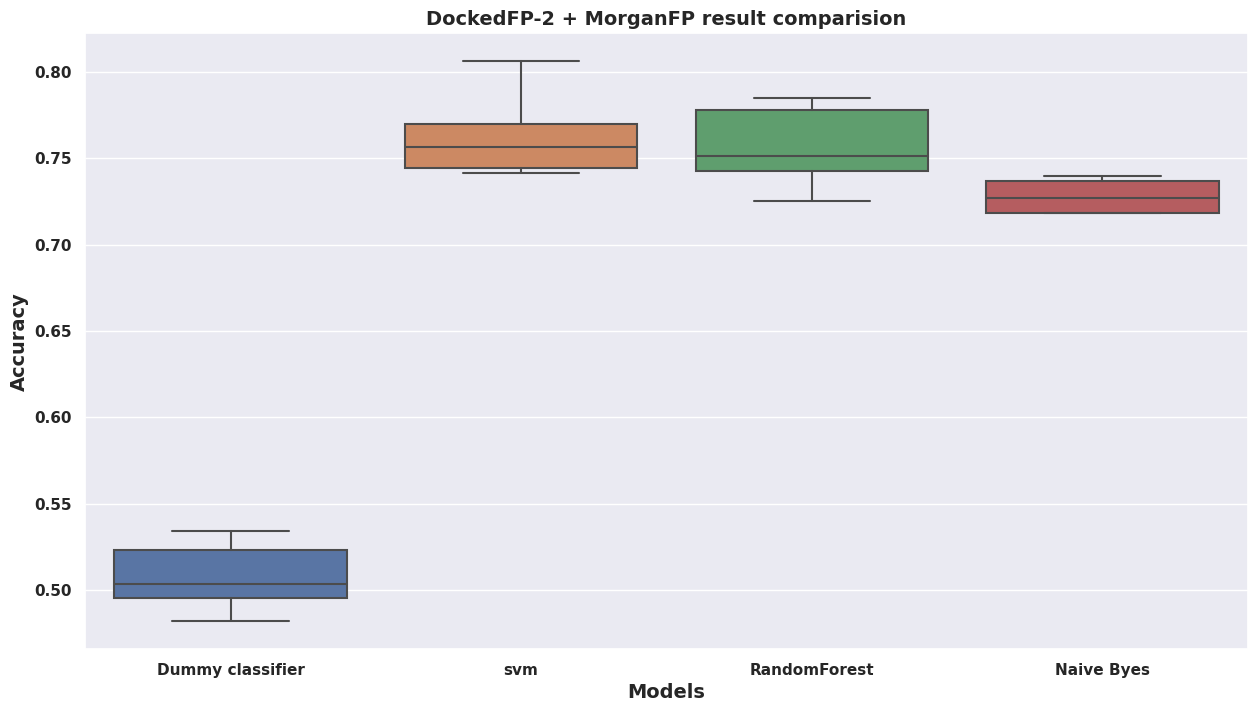

In [355]:
df = pd.DataFrame(data=score_res,)
sns.boxplot(x="variable", y="value", data=pd.melt(df), )
plt.xlabel("Models",fontdict={"weight":"bold","fontsize":14})
plt.ylabel("Accuracy",fontdict={"weight":"bold","fontsize":14})
plt.title("DockedFP-2 + MorganFP result comparision",fontdict={"weight":"bold","fontsize":14})
plt.show()

# Without Interaction Fingerprint

In [188]:
final_fp = pd.concat([fp,fdata.LABELS.reset_index(drop=True)],axis=1)

In [189]:
final_fp

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,LABELS
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
#X_train, X_test, y_train, y_test = train_test_split(final_fp.drop("LABELS",axis=1), final_fp["LABELS"], test_size=0.33, random_state=42,shuffle=True,stratify=final_fp.LABELS)

In [191]:
df = final_fp

In [192]:
X = df.drop("LABELS",axis=1).to_numpy()
y = df["LABELS"].to_numpy()

#### With SVM

In [194]:
clf = svm.SVC()

In [195]:
res = trainLoop(clf,X,y)
print("----------------------------------------------------")
print(f""" training metrics: accuracy:- {res[0][0]}, precision:- {res[0][1]}, Recall:- {res[0][2]}, F1 score:- {res[0][3]}  """)
print()
print()
print(f""" Test metrics: accuracy:- {res[1][0]}, precision:- {res[1][1]}, Recall:- {res[1][2]}, F1 score:- {res[1][3]}  """)

Training metrics: accuracy:- 0.9217391304347826, precision:- 0.9038828771483132, Recall:- 0.9739368998628258, f1_score:- 0.937603169362826 


Testing metrics: accuracy:- 0.7483443708609272, precision:- 0.7465116279069768, Recall:- 0.8818681318681318, f1_score:- 0.8085642317380353 
Training metrics: accuracy:- 0.9233954451345756, precision:- 0.9146579804560261, Recall:- 0.9629629629629629, f1_score:- 0.9381891079184764 


Testing metrics: accuracy:- 0.7615894039735099, precision:- 0.7806122448979592, Recall:- 0.8406593406593407, f1_score:- 0.8095238095238095 
Training metrics: accuracy:- 0.929192546583851, precision:- 0.9208115183246073, Recall:- 0.9656829100892245, f1_score:- 0.9427135678391959 


Testing metrics: accuracy:- 0.7466887417218543, precision:- 0.7511848341232228, Recall:- 0.8684931506849315, f1_score:- 0.8055908513341804 
Training metrics: accuracy:- 0.9283643892339545, precision:- 0.9158031088082902, Recall:- 0.970487302676733, f1_score:- 0.9423525491502833 


Testing met

In [205]:
res

((0.9257204214827308,
  0.9152312286130169,
  0.9665207366547003,
  0.9401461497980597),
 (0.7618480445454845,
  0.7685785543024446,
  0.8671774800541925,
  0.8146987688967032))

In [203]:
test = [0.5,0.6,0.7,0.9]
test2 = [0.4,0.8,0.2,0.1]

In [209]:
list(res[0])

[0.9257204214827308,
 0.9152312286130169,
 0.9665207366547003,
 0.9401461497980597]

/home/saurav/anaconda3/envs/Jupyter_Dock/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/home/saurav/anaconda3/envs/Jupyter_Dock/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


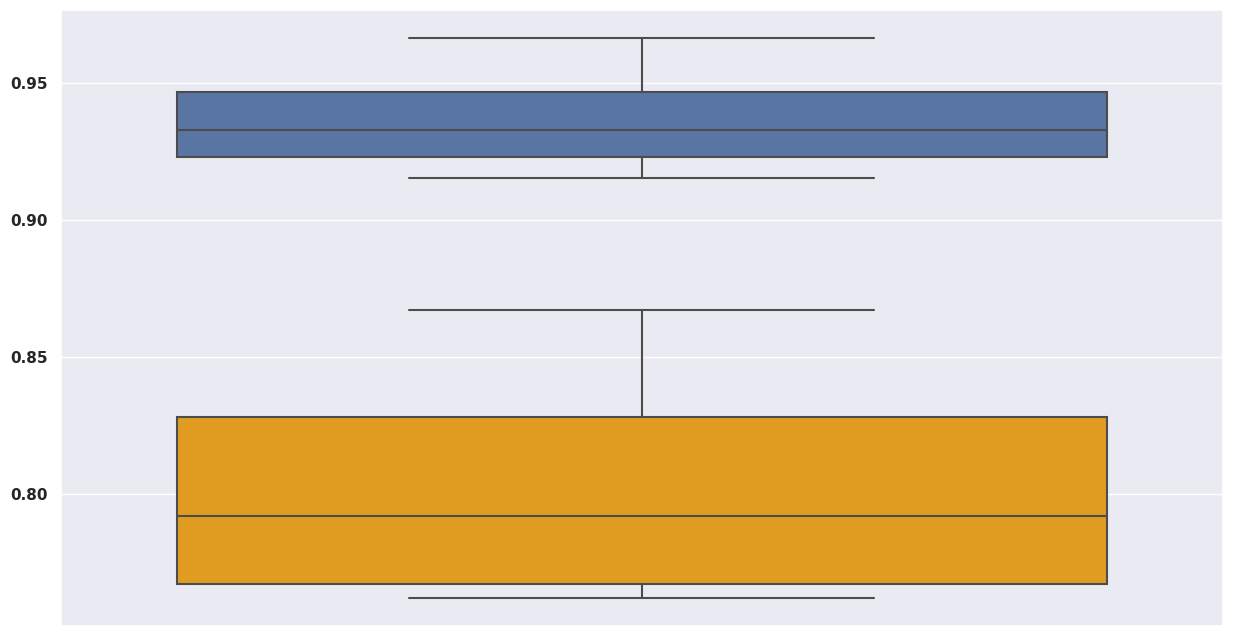

In [211]:
sns.boxplot(y = list(res[0]),orient="h")
sns.boxplot(y = list(res[1]),orient="h",color="orange")
plt.show()

#### With Random Forest

In [621]:
from sklearn.ensemble import RandomForestClassifier

In [622]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [623]:
y_pred = clf.predict(X_train)
accuracy_score(y_train,y_pred) ### great score

1.0

In [624]:
y_pred2 = clf.predict(X_test)
accuracy_score(y_test,y_pred2) 

0.7412236710130391

#### With Logistic Regression

In [625]:
from sklearn.linear_model import LogisticRegression

In [626]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [627]:
y_pred = clf.predict(X_train)
accuracy_score(y_train,y_pred) ### great score

0.9421364985163204

In [628]:
y_pred2 = clf.predict(X_test)
accuracy_score(y_test,y_pred2) 

0.7101303911735206

## With Descriptors

In [642]:
from rdkit import ML
import rdkit.Chem.Descriptors as D
import rdkit.ML.Descriptors.MoleculeDescriptors as rml

In [643]:
l = ["ExactMolWt","MolLogP","MolMR","TPSA","NumHAcceptors","NumHDonors","NumAromaticRings","NumRotatableBonds",
    ]
s = rml.MolecularDescriptorCalculator(l)

In [644]:
def descripCalc(smi):
    mol = MolFromSmiles(smi)
    return s.CalcDescriptors(mol)

In [645]:
fdata["Descriptors"] =  fdata.SMILES.apply(descripCalc)

In [646]:
desArray = []
for i in fdata.Descriptors:
    desArray.append(list(i))

In [647]:
scalarData = pd.DataFrame(desArray)

In [648]:
scalarData

,0,1,2,3,4,5,6,7
0,398.068491,3.70160,100.7296,141.31,7,3,3,6
1,520.101247,-1.12770,117.1361,206.30,12,4,2,9
2,304.910439,3.19840,61.1348,33.12,2,1,2,0
3,341.030979,2.11348,82.8264,73.10,4,2,1,6
4,461.168581,-1.23650,110.8570,149.15,9,5,1,3
...,...,...,...,...,...,...,...,...
3014,123.032028,0.77980,31.1963,50.19,2,1,1,1
3015,404.119463,3.79550,113.6804,63.68,3,0,3,6
3016,254.996617,1.92630,62.1097,44.70,3,1,1,0
3017,332.068473,3.66580,88.0271,75.99,5,2,3,0


In [649]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [650]:
scaledData = scaler.fit_transform(scalarData[[0,1,2,3]])

In [651]:
pd.DataFrame(scaledData)

,0,1,2,3
0,0.337033,0.554799,0.212864,1.188705
1,1.217783,-1.649828,0.668521,2.374951
2,-0.335318,0.325082,-0.886800,-0.786060
3,-0.074624,-0.170195,-0.284360,-0.056315
4,0.792447,-1.699496,0.494132,1.331807
...,...,...,...,...
3014,-1.647992,-0.779034,-1.718280,-0.474486
3015,0.380705,0.597665,0.572546,-0.228256
3016,-0.695562,-0.255645,-0.859724,-0.574693
3017,-0.139310,0.538455,-0.139922,-0.003565


In [652]:
scalarData[[0,1,2,3]] = pd.DataFrame(scaledData)

In [653]:
scalarData

,0,1,2,3,4,5,6,7
0,0.337033,0.554799,0.212864,1.188705,7,3,3,6
1,1.217783,-1.649828,0.668521,2.374951,12,4,2,9
2,-0.335318,0.325082,-0.886800,-0.786060,2,1,2,0
3,-0.074624,-0.170195,-0.284360,-0.056315,4,2,1,6
4,0.792447,-1.699496,0.494132,1.331807,9,5,1,3
...,...,...,...,...,...,...,...,...
3014,-1.647992,-0.779034,-1.718280,-0.474486,2,1,1,1
3015,0.380705,0.597665,0.572546,-0.228256,3,0,3,6
3016,-0.695562,-0.255645,-0.859724,-0.574693,3,1,1,0
3017,-0.139310,0.538455,-0.139922,-0.003565,5,2,3,0


In [657]:
final_df = pd.concat([scalarData,fdata.LABELS.reset_index(drop=True)],axis=1)

In [658]:
final_df

,0,1,2,3,4,5,6,7,LABELS
0,0.337033,0.554799,0.212864,1.188705,7,3,3,6,0
1,1.217783,-1.649828,0.668521,2.374951,12,4,2,9,0
2,-0.335318,0.325082,-0.886800,-0.786060,2,1,2,0,0
3,-0.074624,-0.170195,-0.284360,-0.056315,4,2,1,6,0
4,0.792447,-1.699496,0.494132,1.331807,9,5,1,3,0
...,...,...,...,...,...,...,...,...,...
3014,-1.647992,-0.779034,-1.718280,-0.474486,2,1,1,1,0
3015,0.380705,0.597665,0.572546,-0.228256,3,0,3,6,0
3016,-0.695562,-0.255645,-0.859724,-0.574693,3,1,1,0,0
3017,-0.139310,0.538455,-0.139922,-0.003565,5,2,3,0,0


In [659]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop("LABELS",axis=1), final_df["LABELS"], test_size=0.33, random_state=42,shuffle=True,stratify=final_df.LABELS)

In [660]:
clf = svm.SVC()
clf.fit(X_train, y_train.values)

SVC()

In [661]:
y_pred = clf.predict(X_train)

In [662]:
accuracy_score(y_train,y_pred) ### great score

0.7329376854599406

### With InteractionFP + Descriptors

In [673]:
final_df = pd.concat([scalarData,FP,fdata.LABELS.reset_index(drop=True)],axis=1)

In [674]:
final_df

,0,1,2,3,4,5,6,7,0,1,...,53,54,55,56,57,58,59,60,61,LABELS
0,0.337033,0.554799,0.212864,1.188705,7,3,3,6,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.217783,-1.649828,0.668521,2.374951,12,4,2,9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.335318,0.325082,-0.886800,-0.786060,2,1,2,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,-0.074624,-0.170195,-0.284360,-0.056315,4,2,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.792447,-1.699496,0.494132,1.331807,9,5,1,3,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,-1.647992,-0.779034,-1.718280,-0.474486,2,1,1,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3015,0.380705,0.597665,0.572546,-0.228256,3,0,3,6,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3016,-0.695562,-0.255645,-0.859724,-0.574693,3,1,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3017,-0.139310,0.538455,-0.139922,-0.003565,5,2,3,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [675]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop("LABELS",axis=1), final_df["LABELS"], test_size=0.33, random_state=42,shuffle=True,stratify=final_df.LABELS)

In [676]:
clf = svm.SVC()
clf.fit(X_train, y_train.values)

SVC()

In [677]:
y_pred = clf.predict(X_train)
accuracy_score(y_train,y_pred)

0.7359050445103857

In [678]:
y_pred2 = clf.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7251755265797393